In [1]:
import pandas as pd
import csv
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import resample, shuffle
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os


import time
from scipy.stats import spearmanr
from sklearn.model_selection import GridSearchCV

import os
import sys
import subprocess
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit
import joblib
import glob

import json
import shutil
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pickle

from boruta import BorutaPy
from copy import deepcopy
import shap 

from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches

from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
from matplotlib.lines import Line2D
import geopandas as gpd
from sklearn.metrics.pairwise import haversine_distances
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
grid_5 = gpd.read_file('/Users/huangliting/Desktop/kissing_bugs_stats/reproject_grid/grid_005d.shp')
print(grid_5.crs)
#grid_5 = grid_5.set_crs('None', allow_override=True)
print(grid_5.crs)

epsg:4326
epsg:4326


epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


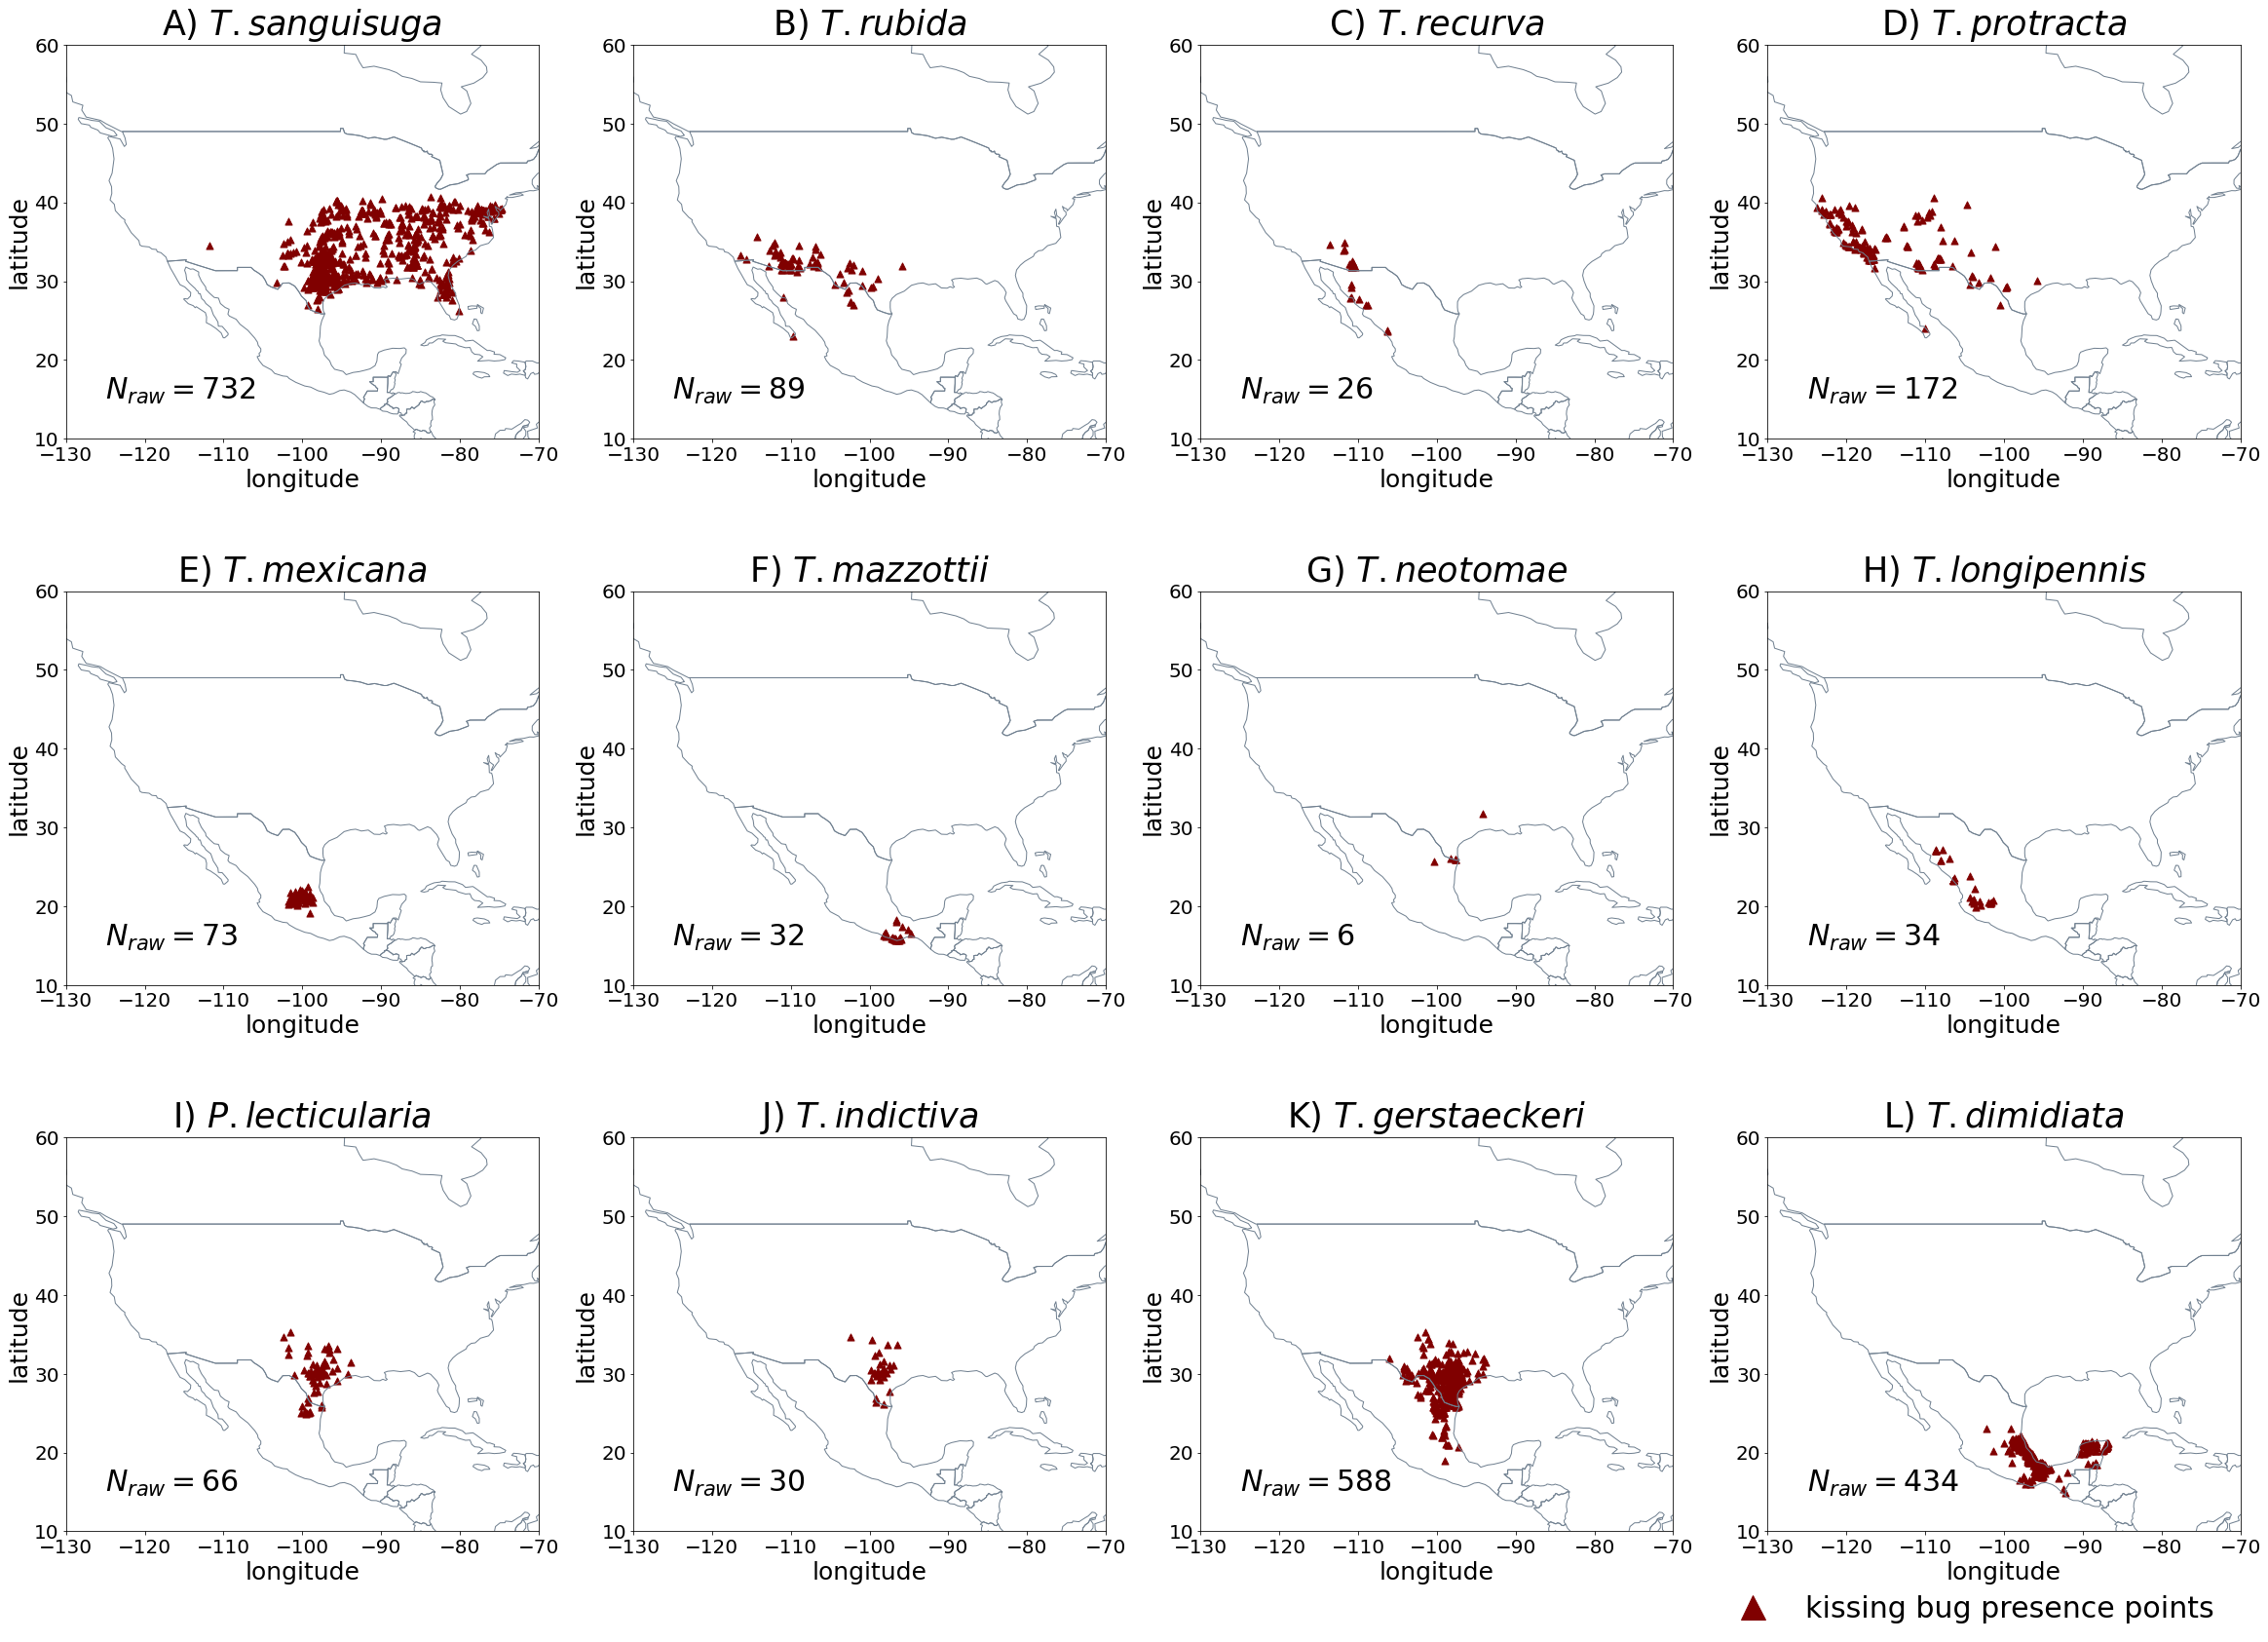

In [3]:

fig, ax = plt.subplots(3,4, figsize=(40,30))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','neo','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
for i in range(len(sp_rarefied_name_list)):
    
    ax_0 = i // 4
    ax_1 = i % 4


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    print(world.crs)
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1)

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    sp_path = '/Users/huangliting/Desktop/kissing_bugs_stats/raw_data/'+sp_rarefied_name_list[i]+'-raw-csv.csv'
    pre_select = pd.read_csv(sp_path)
    gdf4 = gpd.GeoDataFrame(pre_select, geometry=gpd.points_from_xy(pre_select.longitudes, pre_select.latitudes))

    gdf4.plot(marker='^', ax=ax[ax_0,ax_1], color='maroon', markersize=50)
    number_points = len(pre_select)

    ax[ax_0,ax_1].text(x=-125, y=15, s='$N_{raw}=$'+str(number_points), fontsize=30)
    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    ax[ax_0,ax_1].set_aspect('equal')
    
    

plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=0.2)

patch3 = Line2D([0], [0], marker='^',color='maroon', label='kissing bug presence points',linestyle='None',markersize=25 )
plt.legend(handles=[patch3],fontsize=30,loc='lower right', frameon=False,bbox_to_anchor=[1, -0.3])
#plt.tight_layout()
plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/historical_points_raw.png',dpi=300)


epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


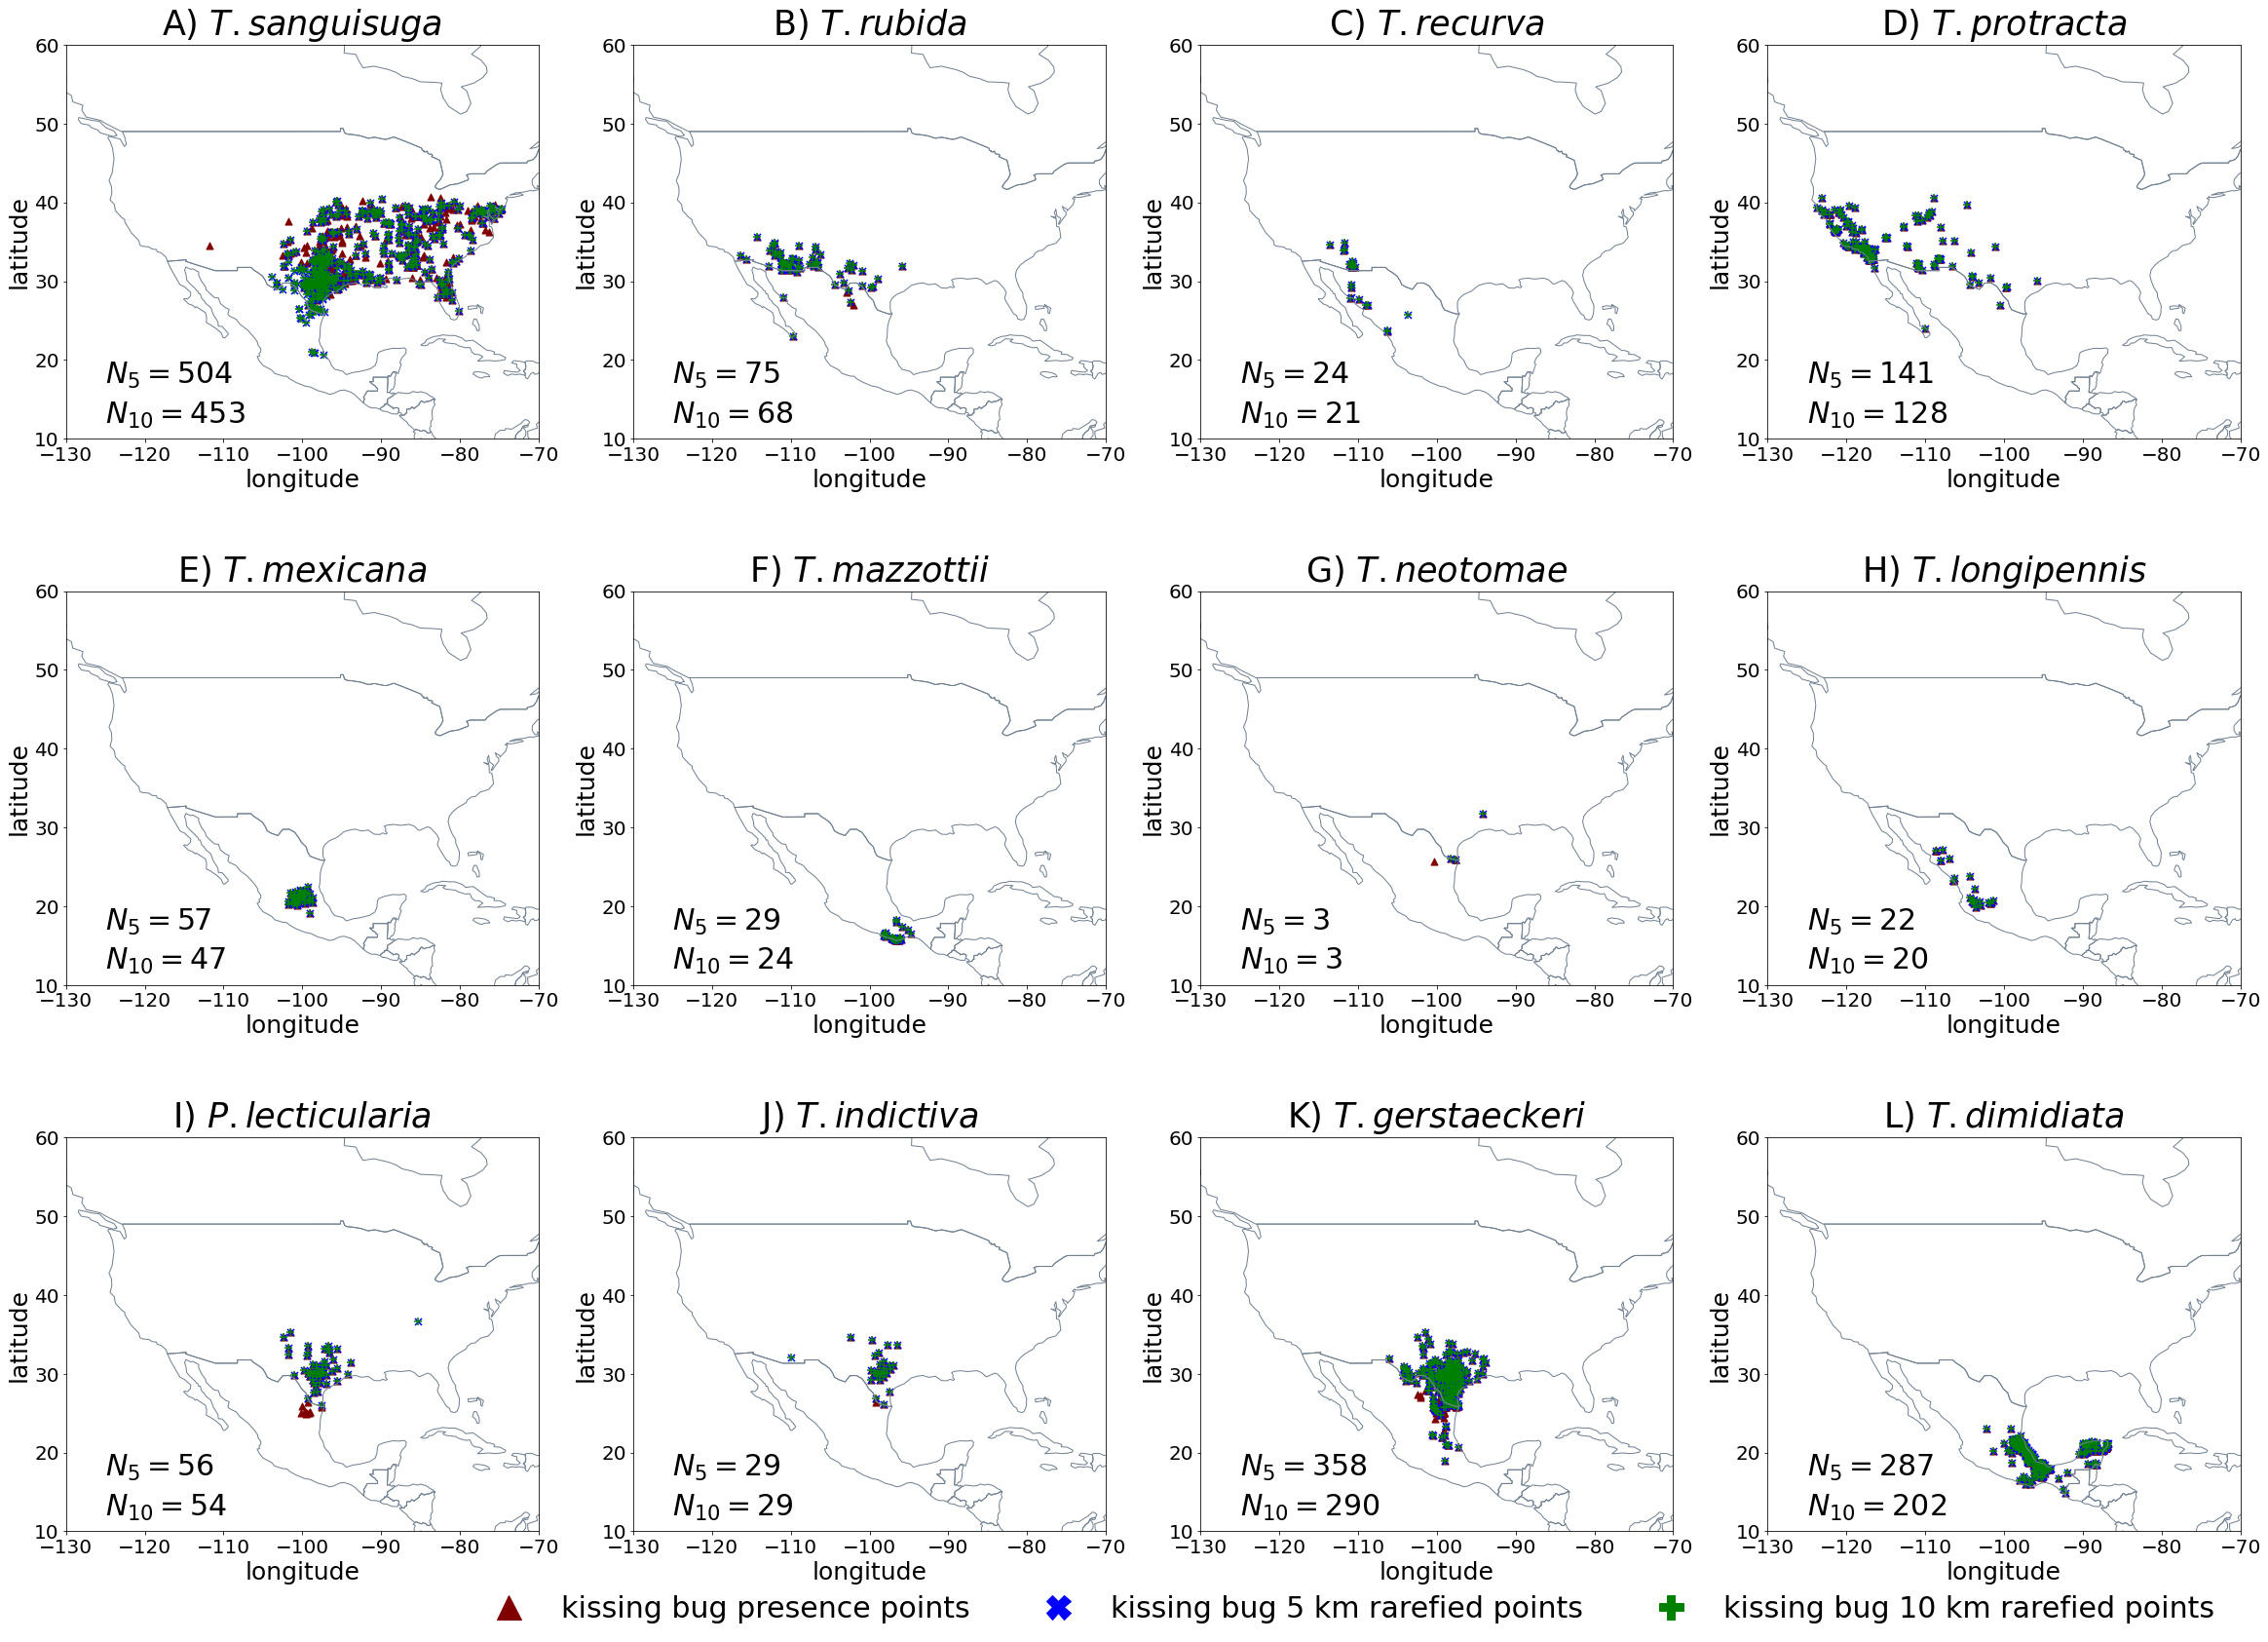

In [4]:

fig, ax = plt.subplots(3,4, figsize=(40,30))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','neo','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']

for i in range(len(sp_rarefied_name_list)):
    
    ax_0 = i // 4
    ax_1 = i % 4


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    print(world.crs)
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1)

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    sp_path = '/Users/huangliting/Desktop/kissing_bugs_stats/raw_data/'+sp_rarefied_name_list[i]+'-raw-csv.csv'
    pre_select = pd.read_csv(sp_path)
    gdf4 = gpd.GeoDataFrame(pre_select, geometry=gpd.points_from_xy(pre_select.longitudes, pre_select.latitudes))
    gdf4.plot(marker='^', ax=ax[ax_0,ax_1], color='maroon', markersize=50)
    number_points = len(pre_select)
    #ax[ax_0,ax_1].text(x=-125, y=15, s='$N_{raw}=$'+str(number_points), fontsize=30)
    
    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    
    #5km
    sp_path = '/Users/huangliting/Desktop/kissing_bugs_stats/Rarefied_Data/'+bug_name_list[i]+'_rarefied_points.csv'
    pre_select = pd.read_csv(sp_path)
    gdf5 = gpd.GeoDataFrame(pre_select, geometry=gpd.points_from_xy(pre_select.longitudes, pre_select.latitudes))
    gdf5.plot(marker='x', ax=ax[ax_0,ax_1], color='blue', markersize=50)
    number_points = len(pre_select)
    ax[ax_0,ax_1].text(x=-125, y=17, s='$N_{5}=$'+str(number_points), fontsize=30)
    
        
    #10km
    sp_path = '/Users/huangliting/Desktop/kissing_bugs_stats/Rarefied_Data/'+bug_name_list[i]+'_10_rarefied_points.csv'
    pre_select = pd.read_csv(sp_path)
    gdf6 = gpd.GeoDataFrame(pre_select, geometry=gpd.points_from_xy(pre_select.longitudes, pre_select.latitudes))
    gdf6.plot(marker='+', ax=ax[ax_0,ax_1], color='green', markersize=50)
    number_points = len(pre_select)   
    ax[ax_0,ax_1].text(x=-125, y=12, s='$N_{10}=$'+str(number_points), fontsize=30)
    

plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=0.2)


patch4 = Line2D([0], [0], marker='^',color='maroon', label='kissing bug presence points',linestyle='None',markersize=25 )
patch5 = Line2D([0], [0], marker='X',color='blue', label='kissing bug 5 km rarefied points',linestyle='None',markersize=25 )
patch6 = Line2D([0], [0], marker='P',color='green', label='kissing bug 10 km rarefied points',linestyle='None',markersize=25 )
plt.legend(handles=[patch4,patch5,patch6],fontsize=30,loc='lower right', frameon=False,bbox_to_anchor=(1, -0.3),ncol=3)
#plt.tight_layout()
#plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/historical_points_three.png',dpi=300)


epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326
epsg:4326


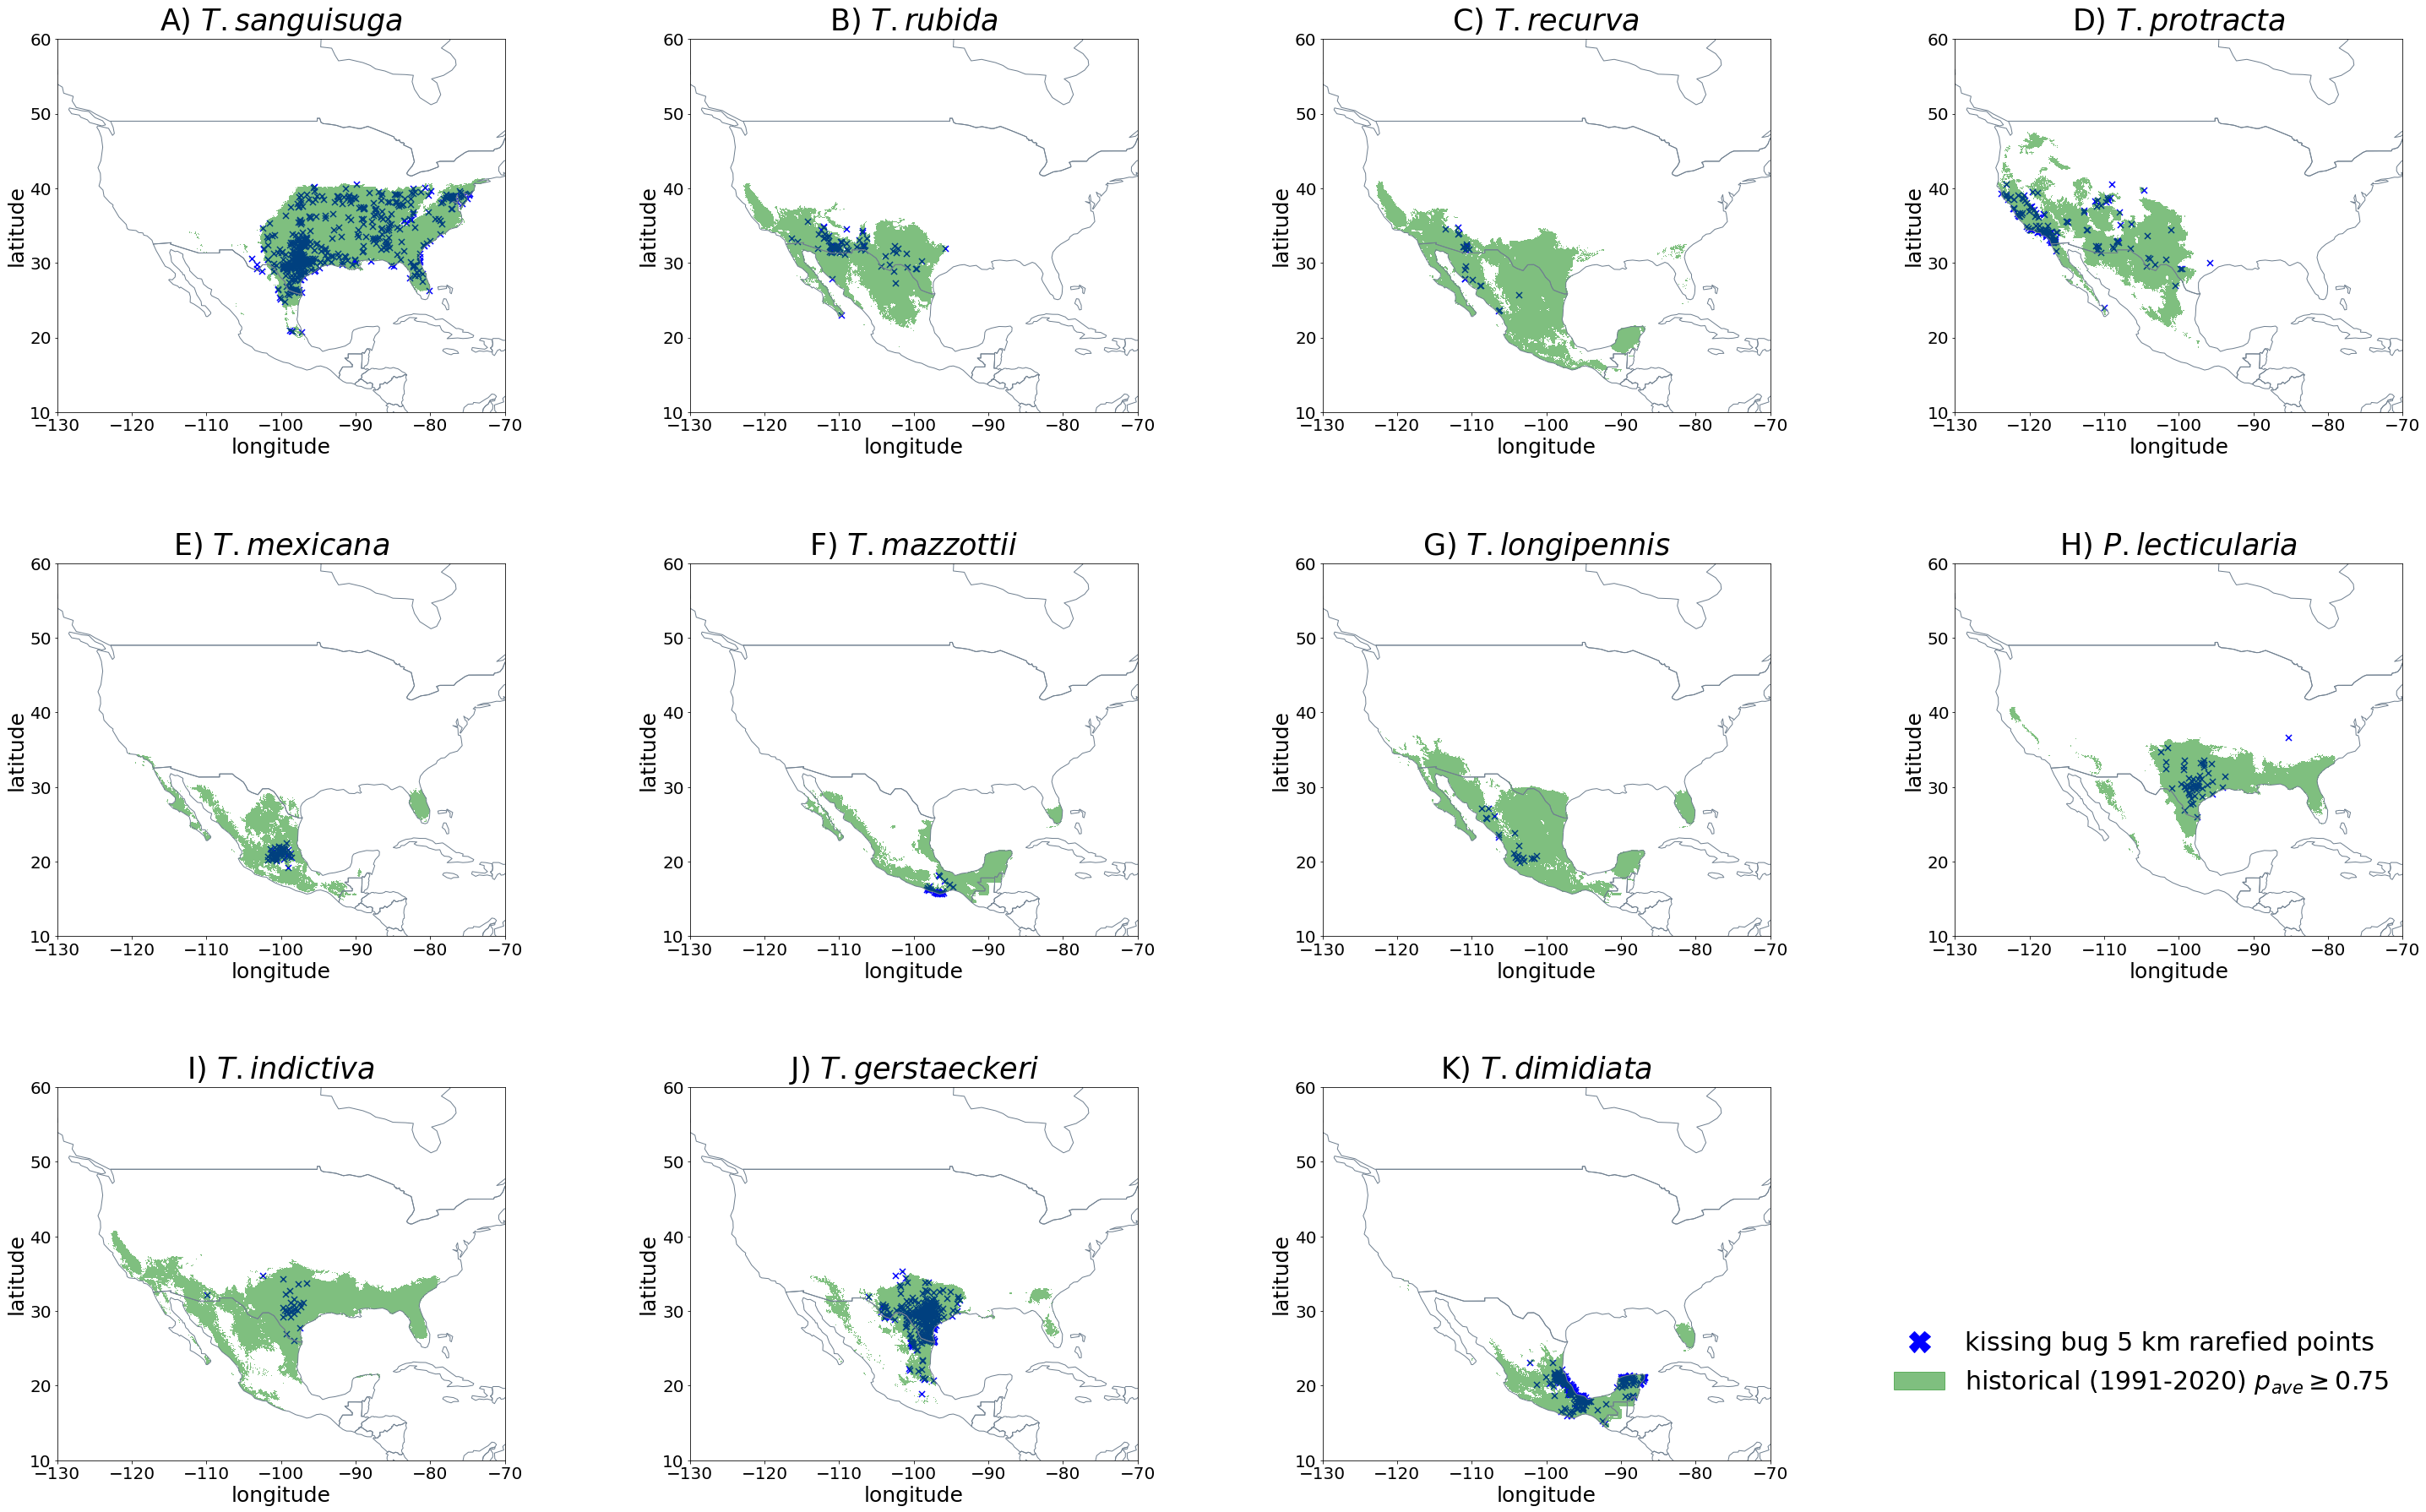

In [5]:

fig, ax = plt.subplots(3,4, figsize=(40,26))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ['San','Rub','Rec','Pro','Mex','Maz','Lon','Lec','Ind','Ger','Dim']
predict_list = ['2011_2040','2041_2070','2071_2100']

rarefied_name = ''
grid_name = '5'
buffer_name = 'b_05'
ssp_list = ['ssp126','ssp245','ssp370','ssp585']
label_ssp = 'ssp126'
num_runs = 50


for i in range(len(sp_rarefied_name_list)):

    
    ax_0 = i // 4
    ax_1 = i % 4


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1,figsize=(6,5))

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    
    #5km
    sp_path = '/Users/huangliting/Desktop/kissing_bugs_stats/Rarefied_Data/'+bug_name_list[i]+'_rarefied_points.csv'
    pre_select = pd.read_csv(sp_path)
    gdf5 = gpd.GeoDataFrame(pre_select, geometry=gpd.points_from_xy(pre_select.longitudes, pre_select.latitudes))
    gdf5.plot(marker='x', ax=ax[ax_0,ax_1], color='blue', markersize=50,figsize=(6,5))
    number_points = len(pre_select)
   
    
    name_for_saving = bug_name_list[i]+rarefied_name+'_g'+grid_name+'_'+buffer_name


    pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+name_for_saving
    pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
    pre_select = pd.read_csv(pre_path)
    pre_select.drop(columns=['Unnamed: 0'], inplace=True)
    gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
    gdf3.loc[gdf3['prediction']<0.75] = np.nan
    gdf3.plot(ax=ax[ax_0,ax_1],legend=True,color='green',alpha=0.5,figsize=(6,5))
    print(gdf3.crs)
    ax[ax_0,ax_1].set_aspect('equal')
   


    

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)




ax[2,3].set_xlim([-130,-70])
ax[2,3].set_ylim([10,60])
patch5 = Line2D([0], [0], marker='X',color='blue', label='kissing bug 5 km rarefied points',linestyle='None',markersize=25 )
patch0 = mpatches.Patch(color='green', label='historical (1991-2020) $p_{ave}\geq0.75$', alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 0.3),handles=[patch5,patch0],fontsize=30,loc='center right', frameon=False)
plt.tight_layout() 
ax[2][3].axis('off')
plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/historical_predict_075.png',dpi=300)



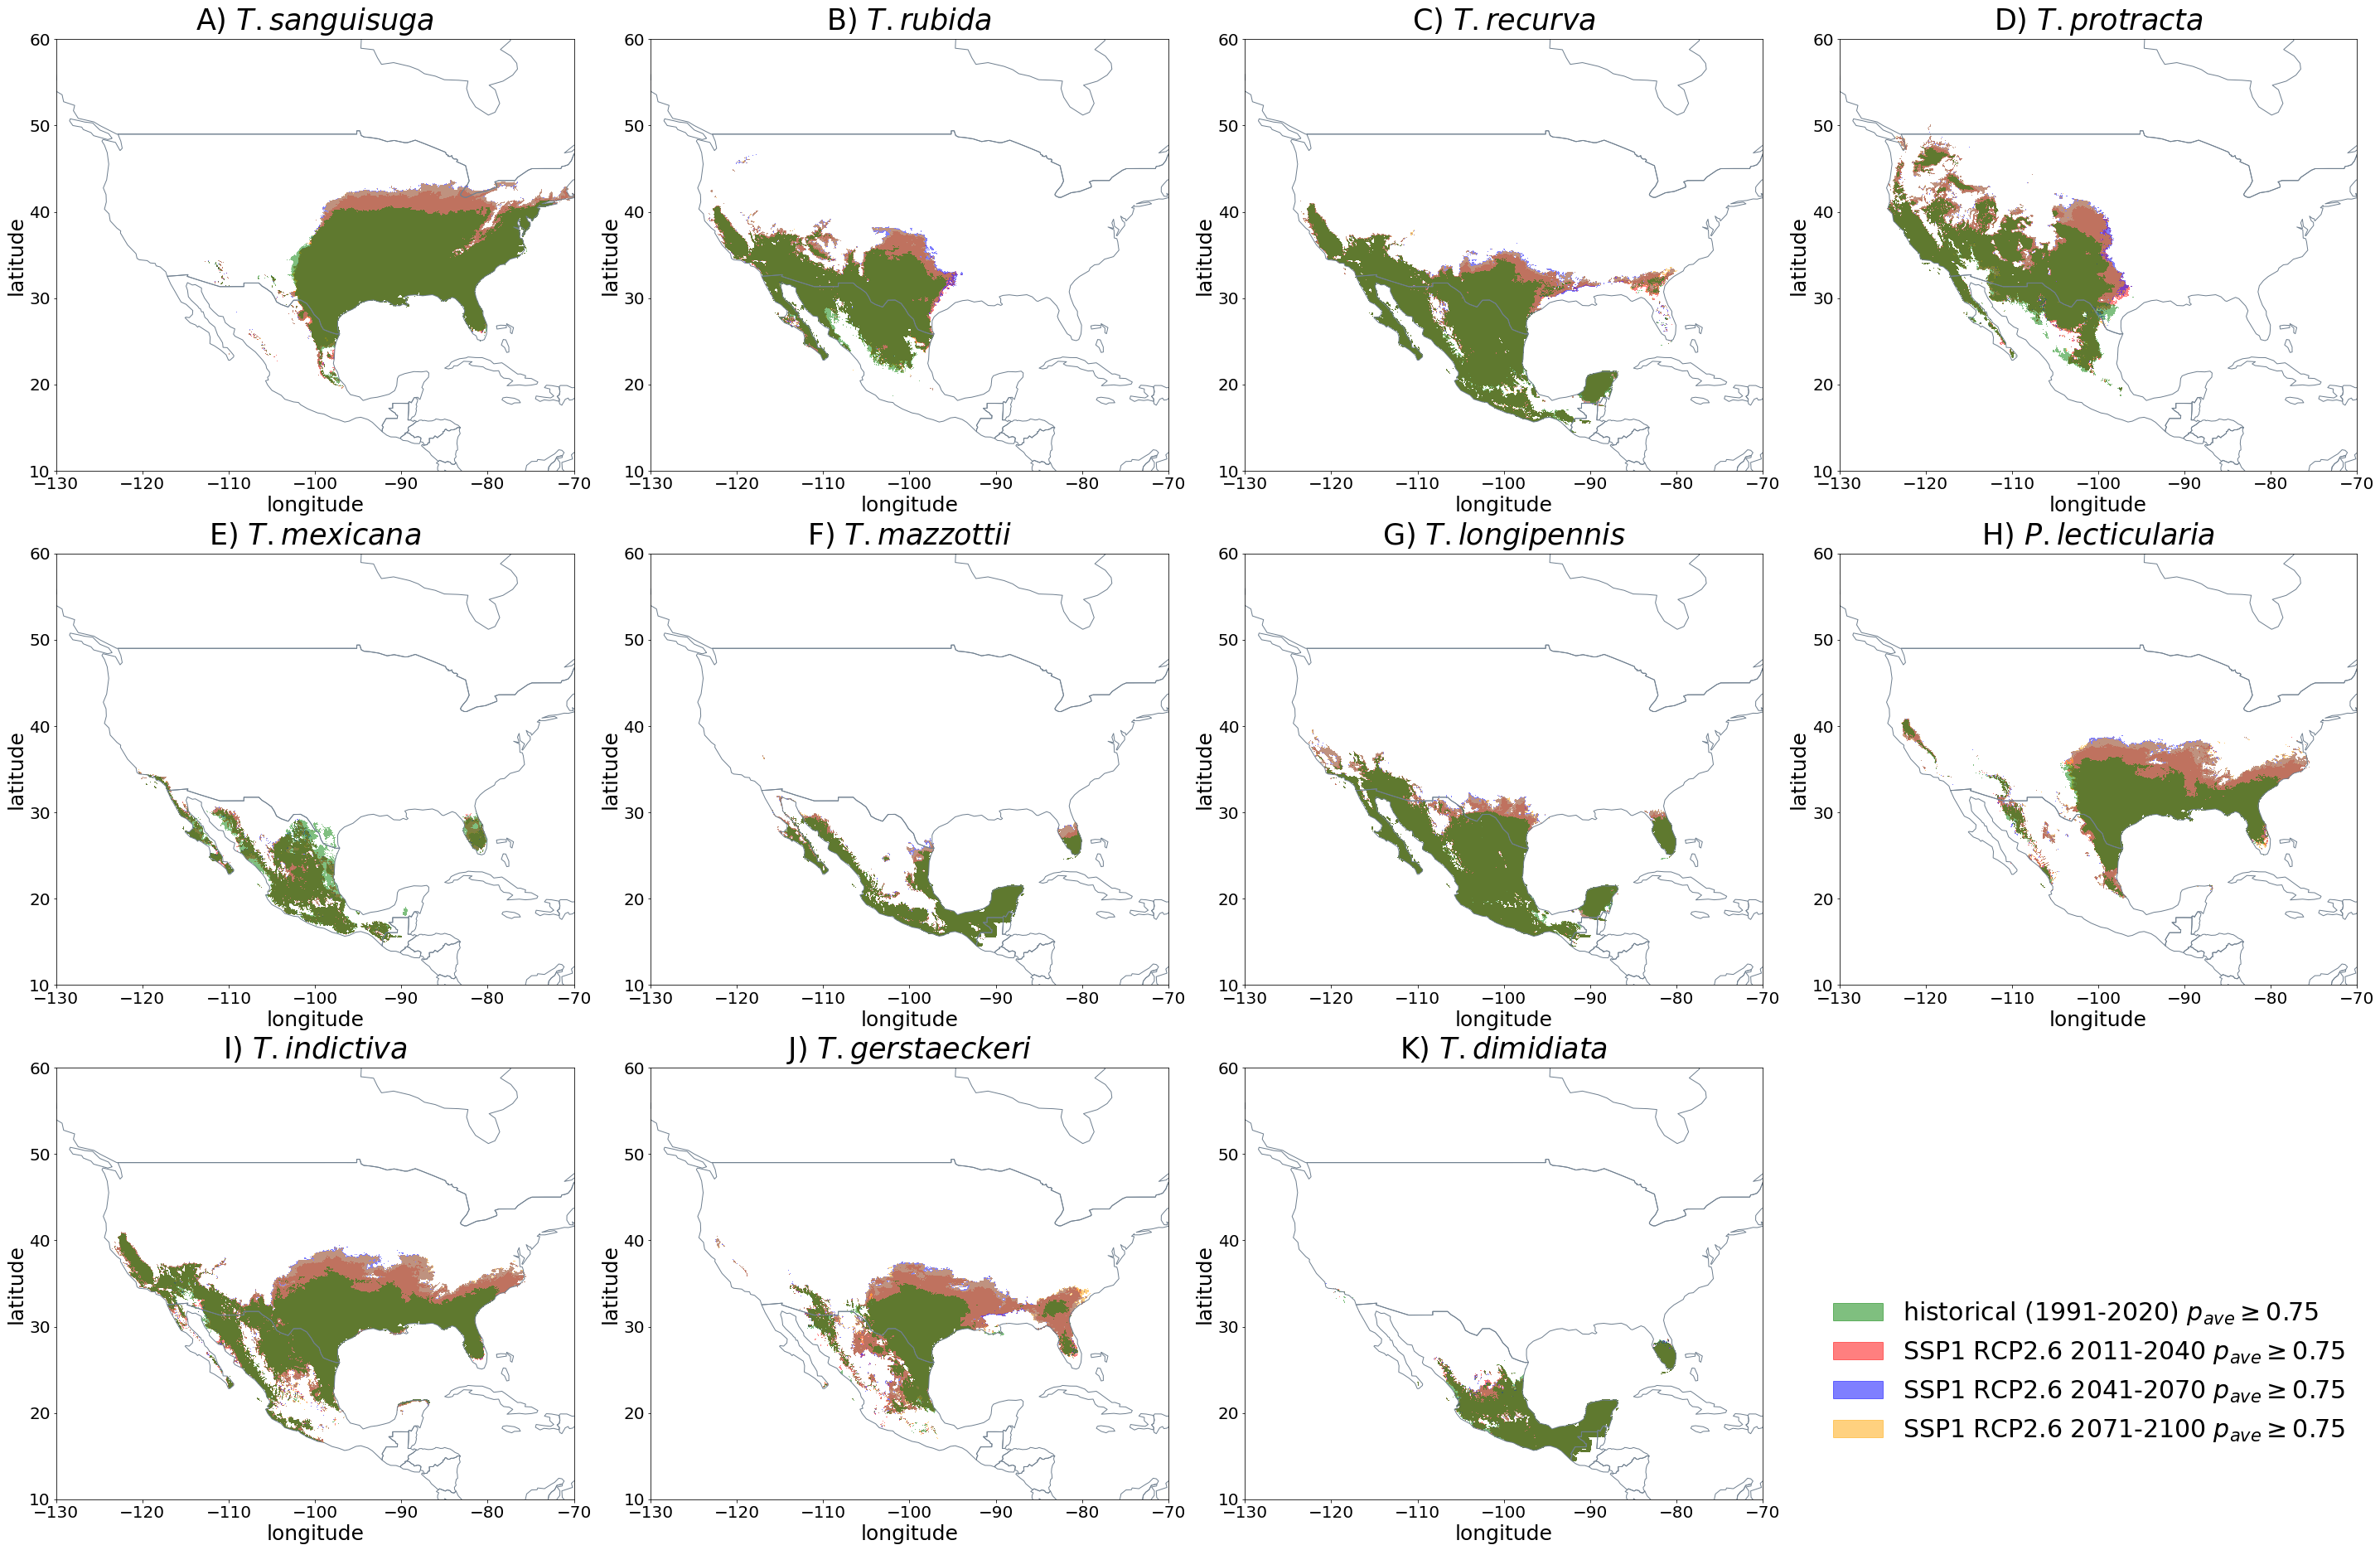

In [6]:

fig, ax = plt.subplots(3,4, figsize=(40,26))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ['San','Rub','Rec','Pro','Mex','Maz','Lon','Lec','Ind','Ger','Dim']
predict_list = ['2011_2040','2041_2070','2071_2100']
predict_name_list = ['2011-2040','2041-2070','2071-2100']

rarefied_name = ''
grid_name = '5'
buffer_name = 'b_05'
ssp_list = ['ssp126','ssp245','ssp370','ssp585']
label_ssp = 'ssp126'
ssp_name="SSP1 RCP2.6"
num_runs = 50
color_list = ['red','blue','orange','green']


for i in range(len(sp_rarefied_name_list)):

    
    ax_0 = i // 4
    ax_1 = i % 4
    this_count = 0


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1,figsize=(6,5))

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    
   
    
    name_for_saving = bug_name_list[i]+rarefied_name+'_g'+grid_name+'_'+buffer_name
    
    for predict_name in predict_list:
        
        pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+label_ssp+'_'+predict_name+'_'+name_for_saving
        pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
        pre_select = pd.read_csv(pre_path)
        pre_select.drop(columns=['Unnamed: 0'], inplace=True)
        gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
        gdf3.loc[gdf3['prediction']<0.75] = np.nan
        gdf3.plot(ax=ax[ax_0,ax_1],legend=True,label='predict_name',color=color_list[this_count],alpha=0.5)

        this_count=this_count+1



    pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+name_for_saving
    pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
    pre_select = pd.read_csv(pre_path)
    pre_select.drop(columns=['Unnamed: 0'], inplace=True)
    gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
    gdf3.loc[gdf3['prediction']<0.75] = np.nan
    gdf3.plot(ax=ax[ax_0,ax_1],legend=True,color='green',alpha=0.5,figsize=(6,5))
    ax[ax_0,ax_1].set_aspect('equal')



    

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)



ax[2,3].set_xlim([-130,-70])
ax[2,3].set_ylim([10,60])


plt.tight_layout() 
ax[2][3].axis('off')



patch0 = mpatches.Patch(color='green', label='historical (1991-2020) $p_{ave}\geq0.75$', alpha=0.5)
patch1 = mpatches.Patch(color=color_list[0], label=ssp_name+' '+predict_name_list[0]+' $p_{ave}\geq0.75$', alpha=0.5)
patch2 = mpatches.Patch(color=color_list[1], label=ssp_name+' '+predict_name_list[1]+' $p_{ave}\geq0.75$', alpha=0.5)
patch3 = mpatches.Patch(color=color_list[2], label=ssp_name+' '+predict_name_list[2]+' $p_{ave}\geq0.75$', alpha=0.5)
            
plt.legend(bbox_to_anchor=(1.02, 0.3),handles=[patch0,patch1,patch2,patch3],fontsize=30,loc='center right', frameon=False)

plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/'+label_ssp+'_predict_075.png',dpi=300)



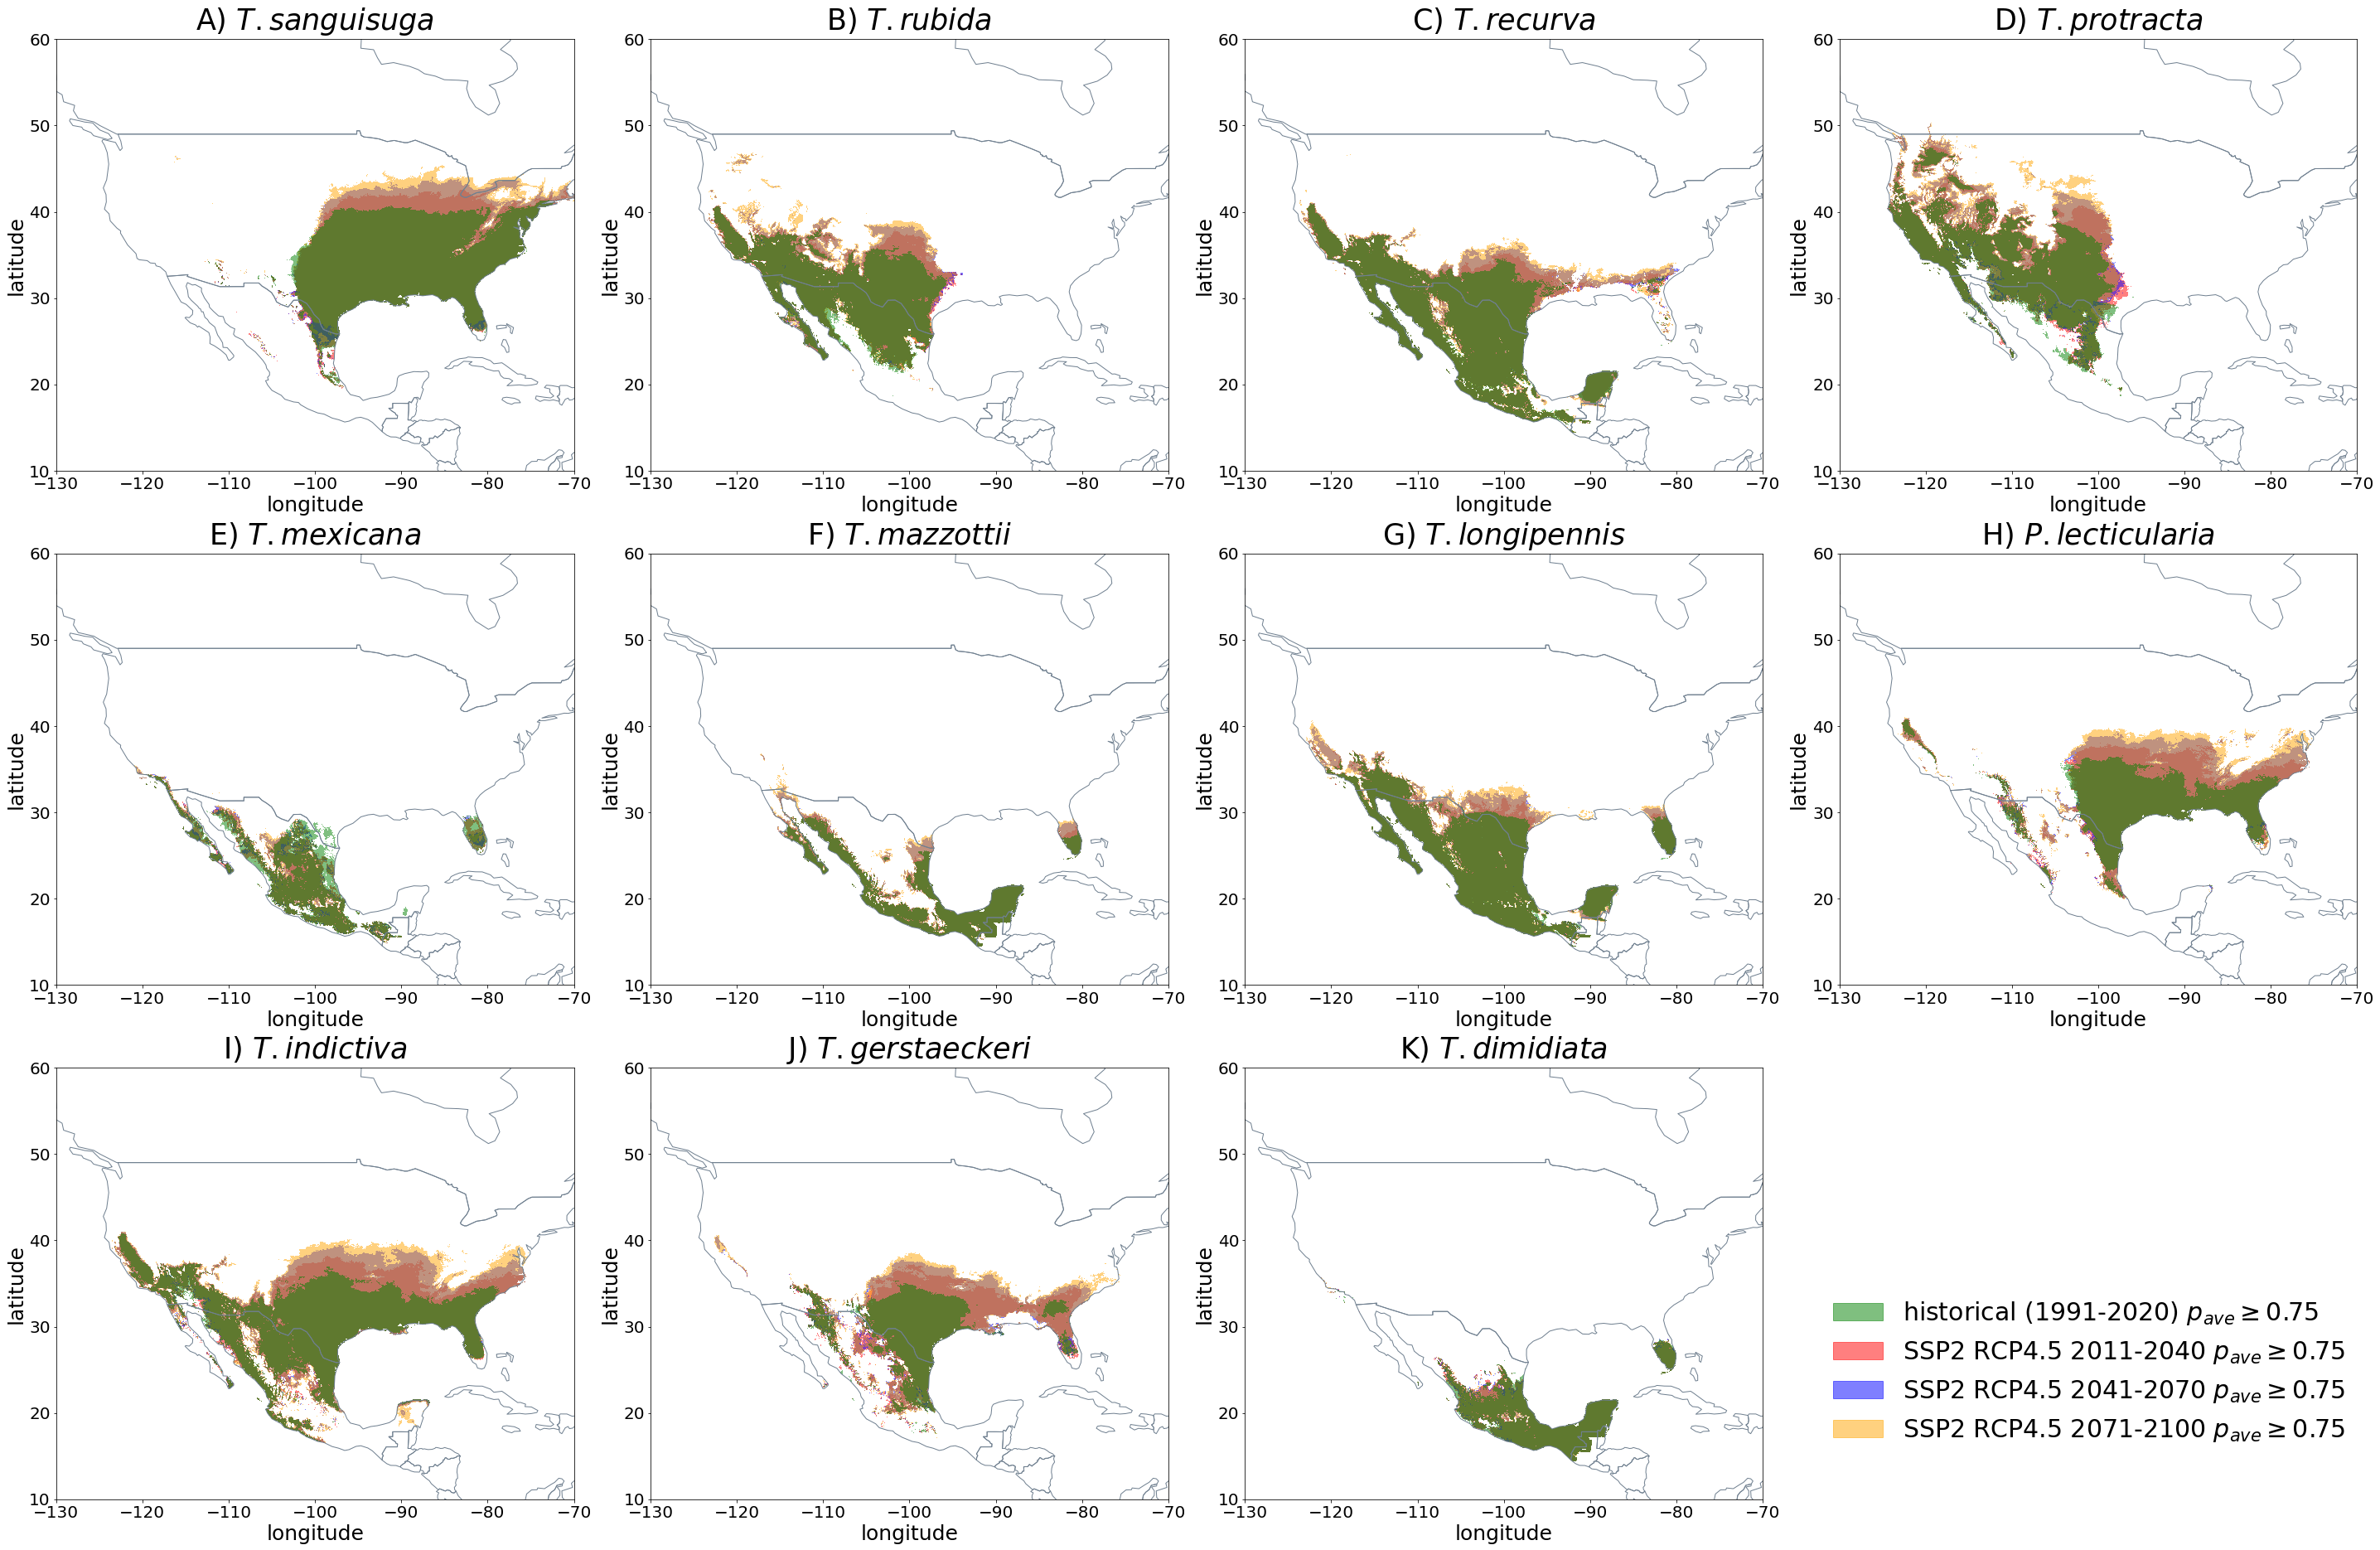

In [7]:

fig, ax = plt.subplots(3,4, figsize=(40,26))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ['San','Rub','Rec','Pro','Mex','Maz','Lon','Lec','Ind','Ger','Dim']
predict_list = ['2011_2040','2041_2070','2071_2100']
predict_name_list = ['2011-2040','2041-2070','2071-2100']

rarefied_name = ''
grid_name = '5'
buffer_name = 'b_05'
ssp_list = ['ssp126','ssp245','ssp370','ssp585']
label_ssp = 'ssp245'
ssp_name="SSP2 RCP4.5"
num_runs = 50
color_list = ['red','blue','orange','green']


for i in range(len(sp_rarefied_name_list)):

    
    ax_0 = i // 4
    ax_1 = i % 4
    this_count = 0


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1,figsize=(6,5))

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)

   
    
    name_for_saving = bug_name_list[i]+rarefied_name+'_g'+grid_name+'_'+buffer_name
    
    for predict_name in predict_list:
        
        pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+label_ssp+'_'+predict_name+'_'+name_for_saving
        pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
        pre_select = pd.read_csv(pre_path)
        pre_select.drop(columns=['Unnamed: 0'], inplace=True)
        gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
        gdf3.loc[gdf3['prediction']<0.75] = np.nan
        gdf3.plot(ax=ax[ax_0,ax_1],legend=True,label='predict_name',color=color_list[this_count],alpha=0.5)

        this_count=this_count+1



    pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+name_for_saving
    pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
    pre_select = pd.read_csv(pre_path)
    pre_select.drop(columns=['Unnamed: 0'], inplace=True)
    gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
    gdf3.loc[gdf3['prediction']<0.75] = np.nan
    gdf3.plot(ax=ax[ax_0,ax_1],legend=True,color='green',alpha=0.5,figsize=(6,5))
    ax[ax_0,ax_1].set_aspect('equal')



    

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)



ax[2,3].set_xlim([-130,-70])
ax[2,3].set_ylim([10,60])


plt.tight_layout() 
ax[2][3].axis('off')



patch0 = mpatches.Patch(color='green', label='historical (1991-2020) $p_{ave}\geq0.75$', alpha=0.5)
patch1 = mpatches.Patch(color=color_list[0], label=ssp_name+' '+predict_name_list[0]+' $p_{ave}\geq0.75$', alpha=0.5)
patch2 = mpatches.Patch(color=color_list[1], label=ssp_name+' '+predict_name_list[1]+' $p_{ave}\geq0.75$', alpha=0.5)
patch3 = mpatches.Patch(color=color_list[2], label=ssp_name+' '+predict_name_list[2]+' $p_{ave}\geq0.75$', alpha=0.5)
            
plt.legend(bbox_to_anchor=(1.02, 0.3),handles=[patch0,patch1,patch2,patch3],fontsize=30,loc='center right', frameon=False)

plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/'+label_ssp+'_predict_075.png',dpi=300)



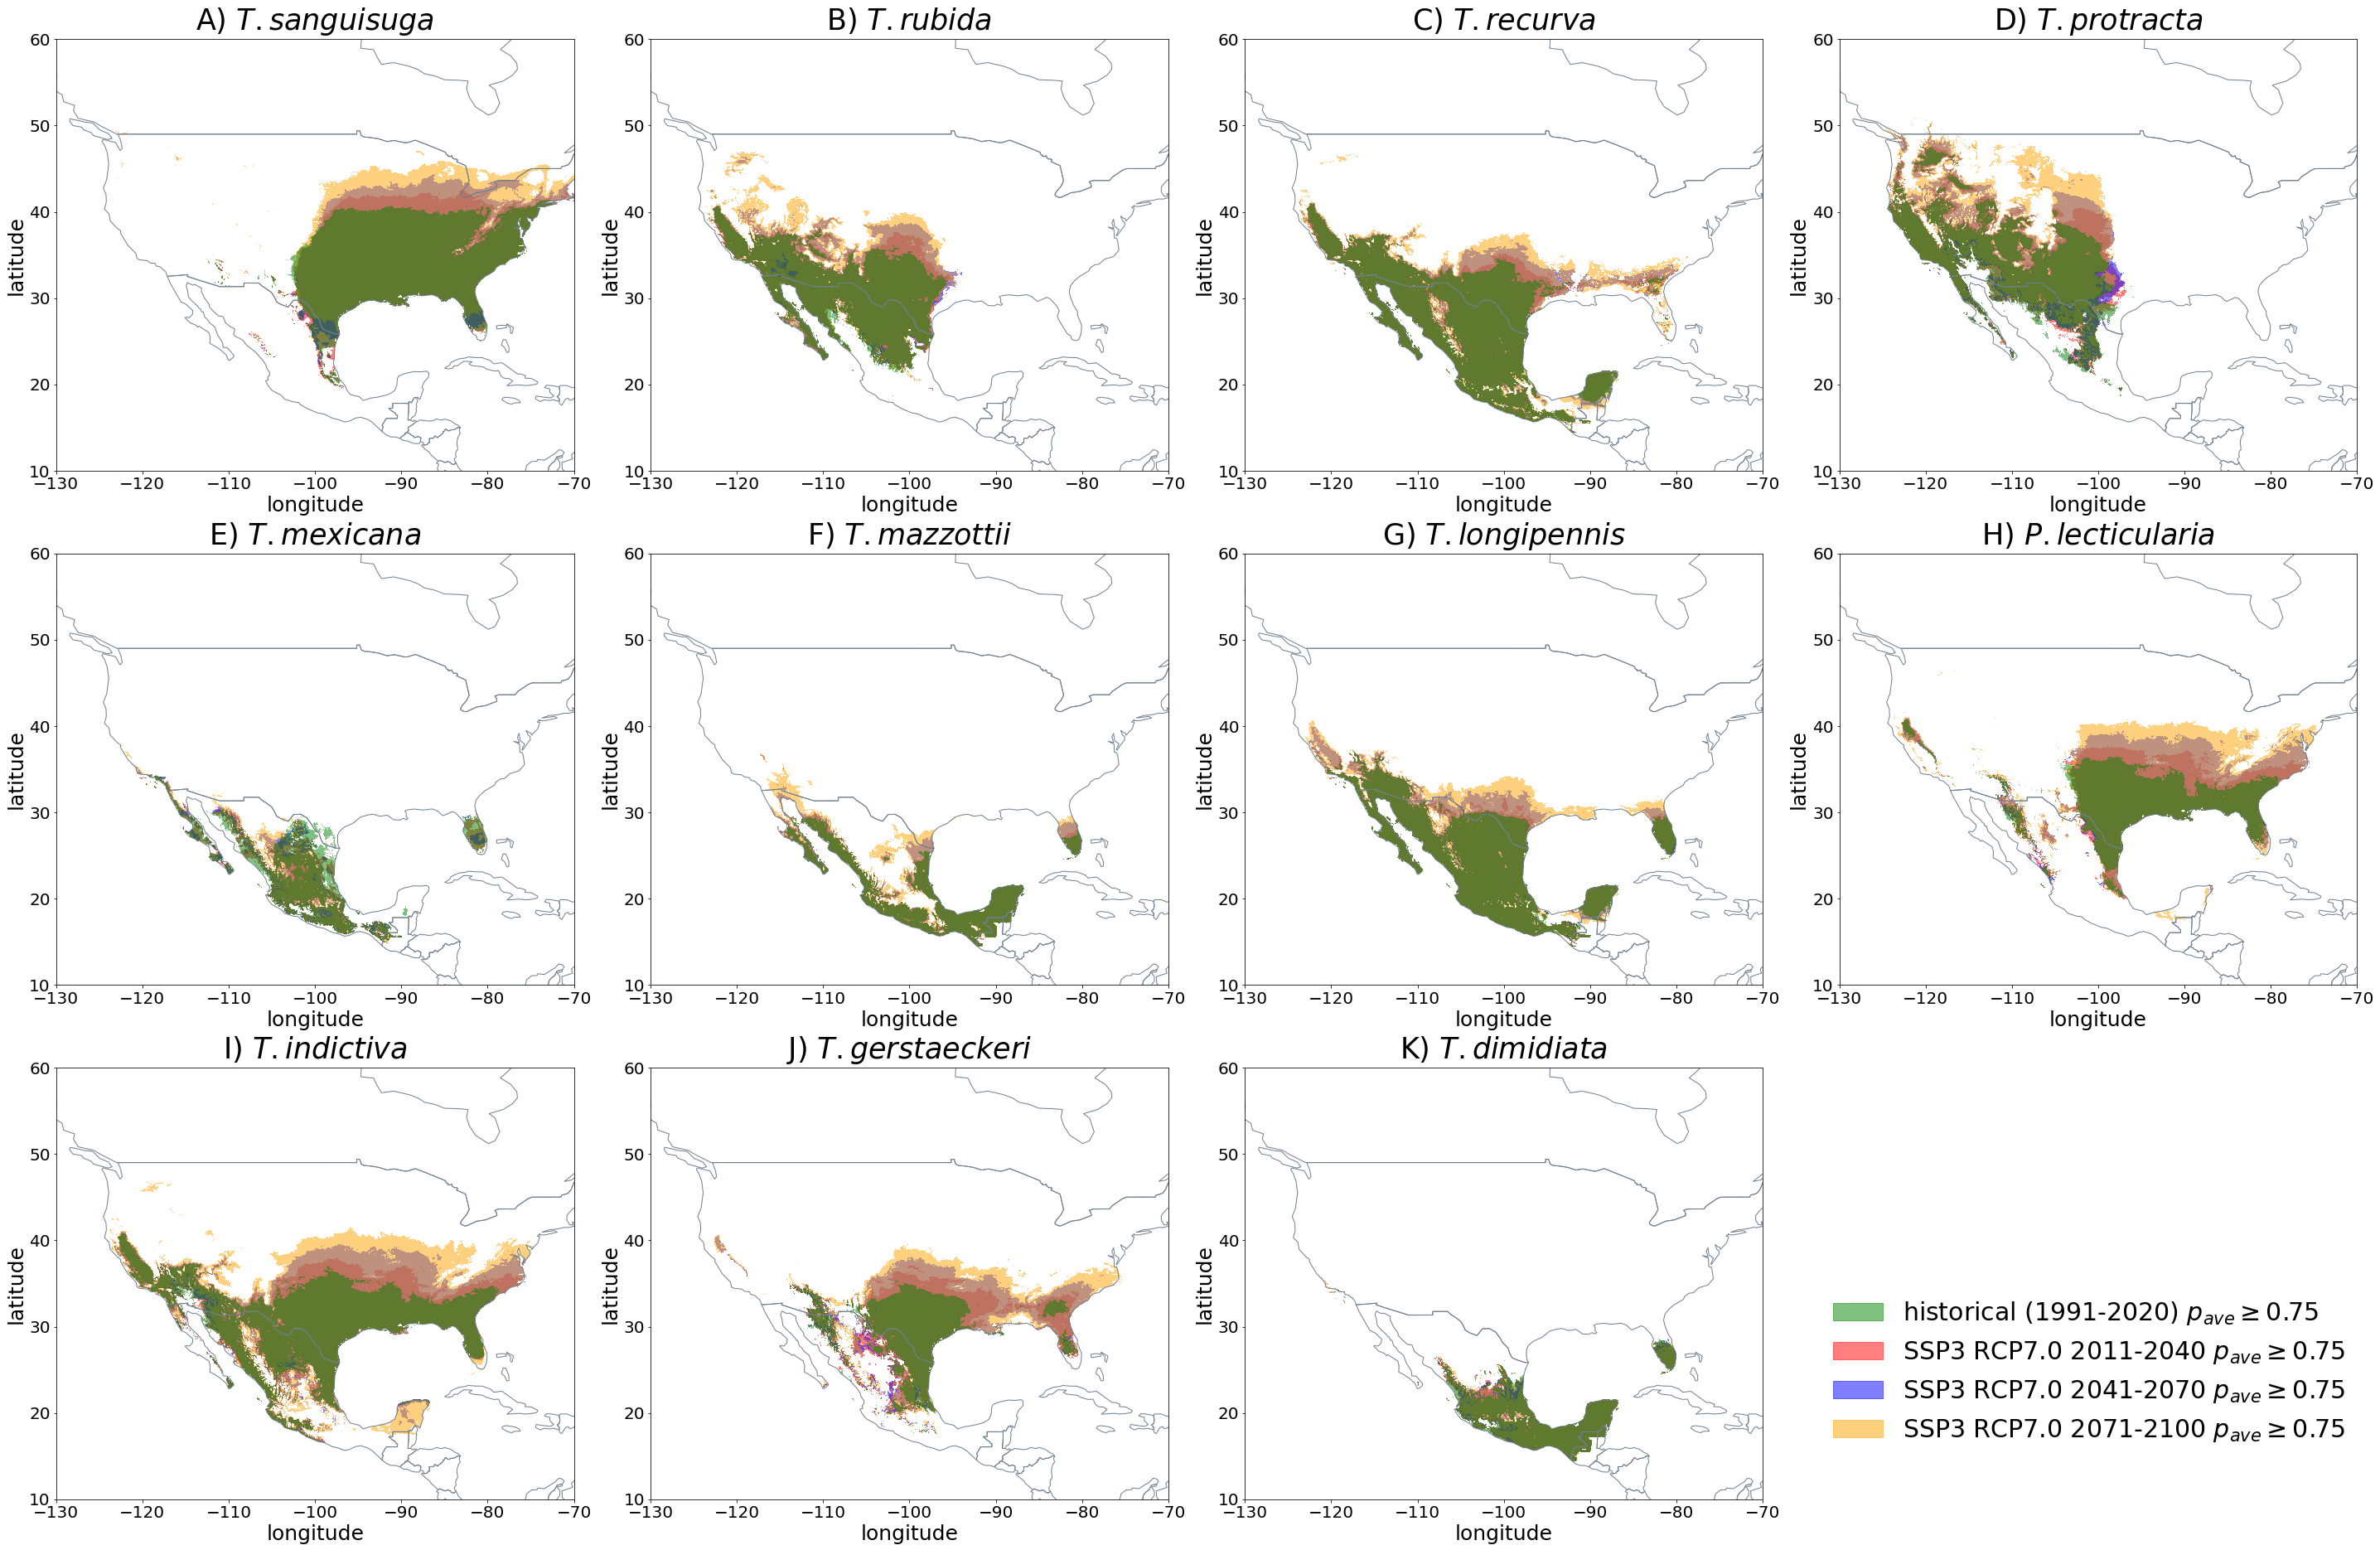

In [8]:

fig, ax = plt.subplots(3,4, figsize=(40,26))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ['San','Rub','Rec','Pro','Mex','Maz','Lon','Lec','Ind','Ger','Dim']
predict_list = ['2011_2040','2041_2070','2071_2100']
predict_name_list = ['2011-2040','2041-2070','2071-2100']

rarefied_name = ''
grid_name = '5'
buffer_name = 'b_05'
ssp_list = ['ssp126','ssp245','ssp370','ssp585']
label_ssp = 'ssp370'
ssp_name="SSP3 RCP7.0"
num_runs = 50
color_list = ['red','blue','orange','green']


for i in range(len(sp_rarefied_name_list)):

    
    ax_0 = i // 4
    ax_1 = i % 4
    this_count = 0


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1,figsize=(6,5))

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    

   
    
    name_for_saving = bug_name_list[i]+rarefied_name+'_g'+grid_name+'_'+buffer_name
    
    for predict_name in predict_list:
        
        pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+label_ssp+'_'+predict_name+'_'+name_for_saving
        pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
        pre_select = pd.read_csv(pre_path)
        pre_select.drop(columns=['Unnamed: 0'], inplace=True)
        gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
        gdf3.loc[gdf3['prediction']<0.75] = np.nan
        gdf3.plot(ax=ax[ax_0,ax_1],legend=True,label='predict_name',color=color_list[this_count],alpha=0.5)

        this_count=this_count+1



    pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+name_for_saving
    pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
    pre_select = pd.read_csv(pre_path)
    pre_select.drop(columns=['Unnamed: 0'], inplace=True)
    gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
    gdf3.loc[gdf3['prediction']<0.75] = np.nan
    gdf3.plot(ax=ax[ax_0,ax_1],legend=True,color='green',alpha=0.5,figsize=(6,5))
    ax[ax_0,ax_1].set_aspect('equal')



    

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)



ax[2,3].set_xlim([-130,-70])
ax[2,3].set_ylim([10,60])


plt.tight_layout() 
ax[2][3].axis('off')



patch0 = mpatches.Patch(color='green', label='historical (1991-2020) $p_{ave}\geq0.75$', alpha=0.5)
patch1 = mpatches.Patch(color=color_list[0], label=ssp_name+' '+predict_name_list[0]+' $p_{ave}\geq0.75$', alpha=0.5)
patch2 = mpatches.Patch(color=color_list[1], label=ssp_name+' '+predict_name_list[1]+' $p_{ave}\geq0.75$', alpha=0.5)
patch3 = mpatches.Patch(color=color_list[2], label=ssp_name+' '+predict_name_list[2]+' $p_{ave}\geq0.75$', alpha=0.5)
            
plt.legend(bbox_to_anchor=(1.02, 0.3),handles=[patch0,patch1,patch2,patch3],fontsize=30,loc='center right', frameon=False)

plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/'+label_ssp+'_predict_075.png',dpi=300)



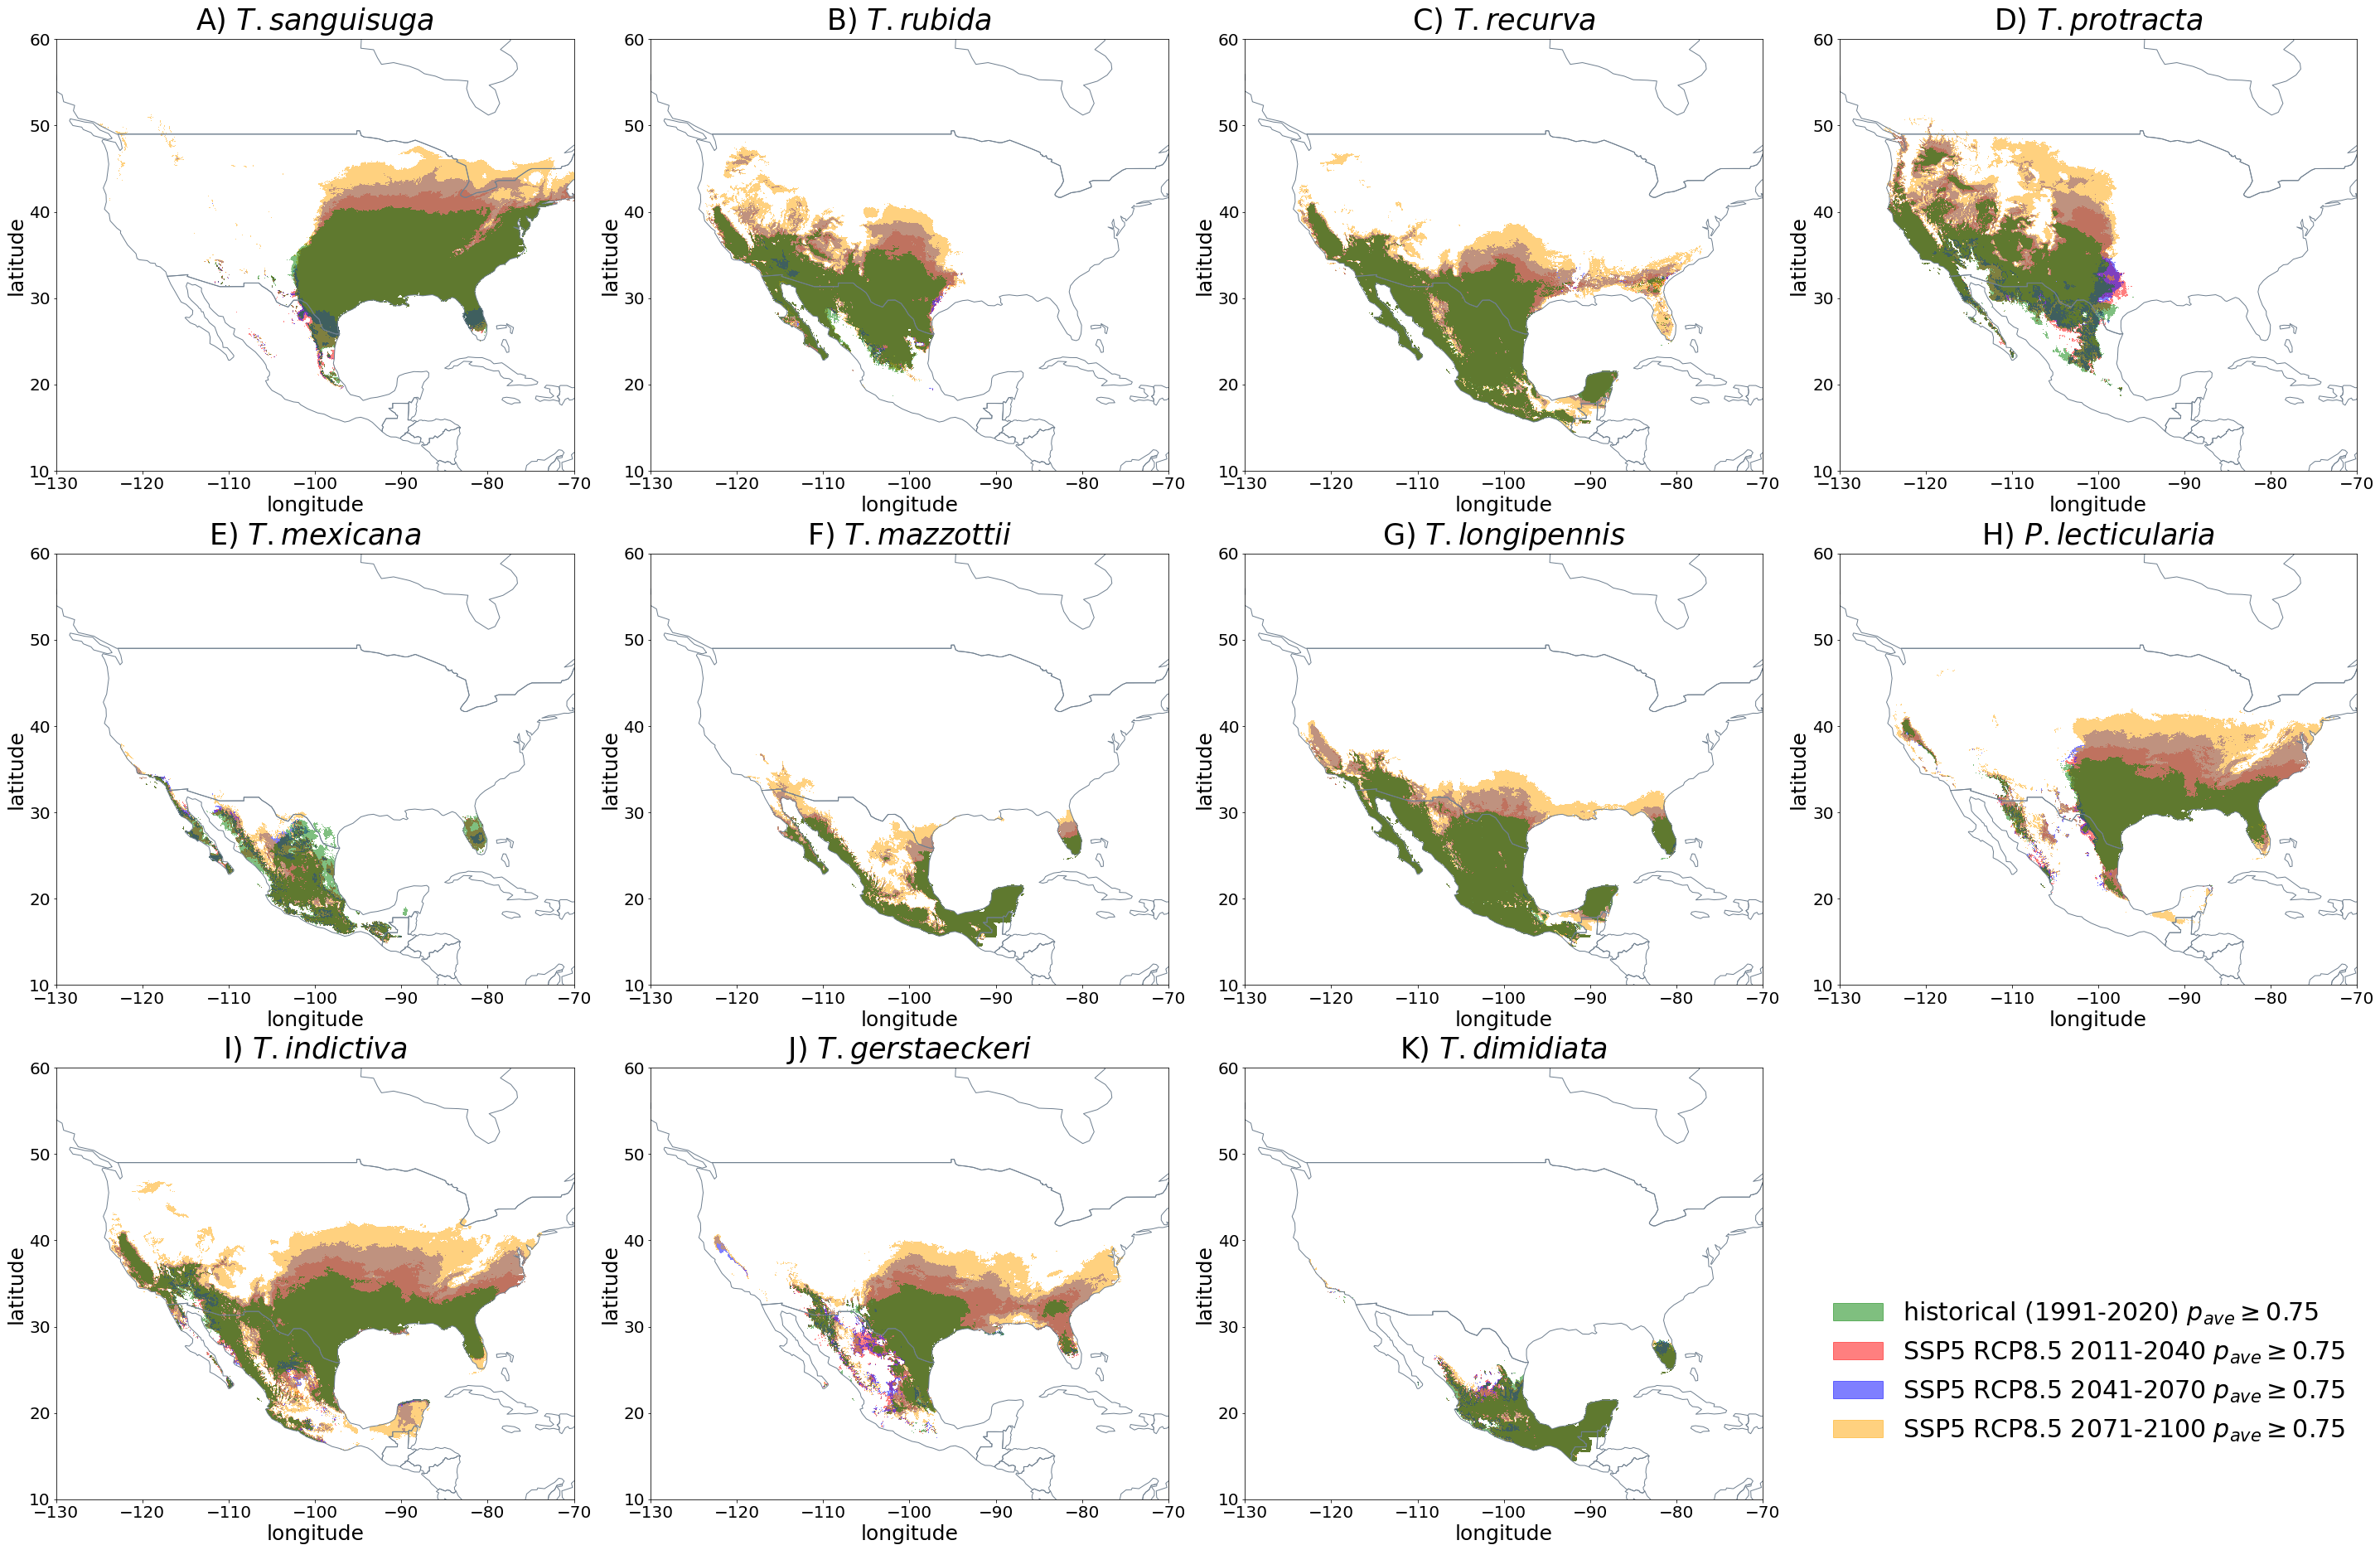

In [9]:

fig, ax = plt.subplots(3,4, figsize=(40,26))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ['San','Rub','Rec','Pro','Mex','Maz','Lon','Lec','Ind','Ger','Dim']
predict_list = ['2011_2040','2041_2070','2071_2100']
predict_name_list = ['2011-2040','2041-2070','2071-2100']

rarefied_name = ''
grid_name = '5'
buffer_name = 'b_05'
ssp_list = ['ssp126','ssp245','ssp370','ssp585']
label_ssp = 'ssp585'
ssp_name="SSP5 RCP8.5"
num_runs = 50
color_list = ['red','blue','orange','green']


for i in range(len(sp_rarefied_name_list)):

    
    ax_0 = i // 4
    ax_1 = i % 4
    this_count = 0


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1,figsize=(6,5))

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    

   
    
    name_for_saving = bug_name_list[i]+rarefied_name+'_g'+grid_name+'_'+buffer_name
    
    for predict_name in predict_list:
        
        pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+label_ssp+'_'+predict_name+'_'+name_for_saving
        pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
        pre_select = pd.read_csv(pre_path)
        pre_select.drop(columns=['Unnamed: 0'], inplace=True)
        gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
        gdf3.loc[gdf3['prediction']<0.75] = np.nan
        gdf3.plot(ax=ax[ax_0,ax_1],legend=True,label='predict_name',color=color_list[this_count],alpha=0.5)

        this_count=this_count+1



    pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+name_for_saving
    pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
    pre_select = pd.read_csv(pre_path)
    pre_select.drop(columns=['Unnamed: 0'], inplace=True)
    gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
    gdf3.loc[gdf3['prediction']<0.75] = np.nan
    gdf3.plot(ax=ax[ax_0,ax_1],legend=True,color='green',alpha=0.5,figsize=(6,5))
    ax[ax_0,ax_1].set_aspect('equal')



    

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)



ax[2,3].set_xlim([-130,-70])
ax[2,3].set_ylim([10,60])


plt.tight_layout() 
ax[2][3].axis('off')



patch0 = mpatches.Patch(color='green', label='historical (1991-2020) $p_{ave}\geq0.75$', alpha=0.5)
patch1 = mpatches.Patch(color=color_list[0], label=ssp_name+' '+predict_name_list[0]+' $p_{ave}\geq0.75$', alpha=0.5)
patch2 = mpatches.Patch(color=color_list[1], label=ssp_name+' '+predict_name_list[1]+' $p_{ave}\geq0.75$', alpha=0.5)
patch3 = mpatches.Patch(color=color_list[2], label=ssp_name+' '+predict_name_list[2]+' $p_{ave}\geq0.75$', alpha=0.5)
            
plt.legend(bbox_to_anchor=(1.02, 0.3),handles=[patch0,patch1,patch2,patch3],fontsize=30,loc='center right', frameon=False)

plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/'+label_ssp+'_predict_075.png',dpi=300)



0
1
2
3
4
5
6
7
8
9
10


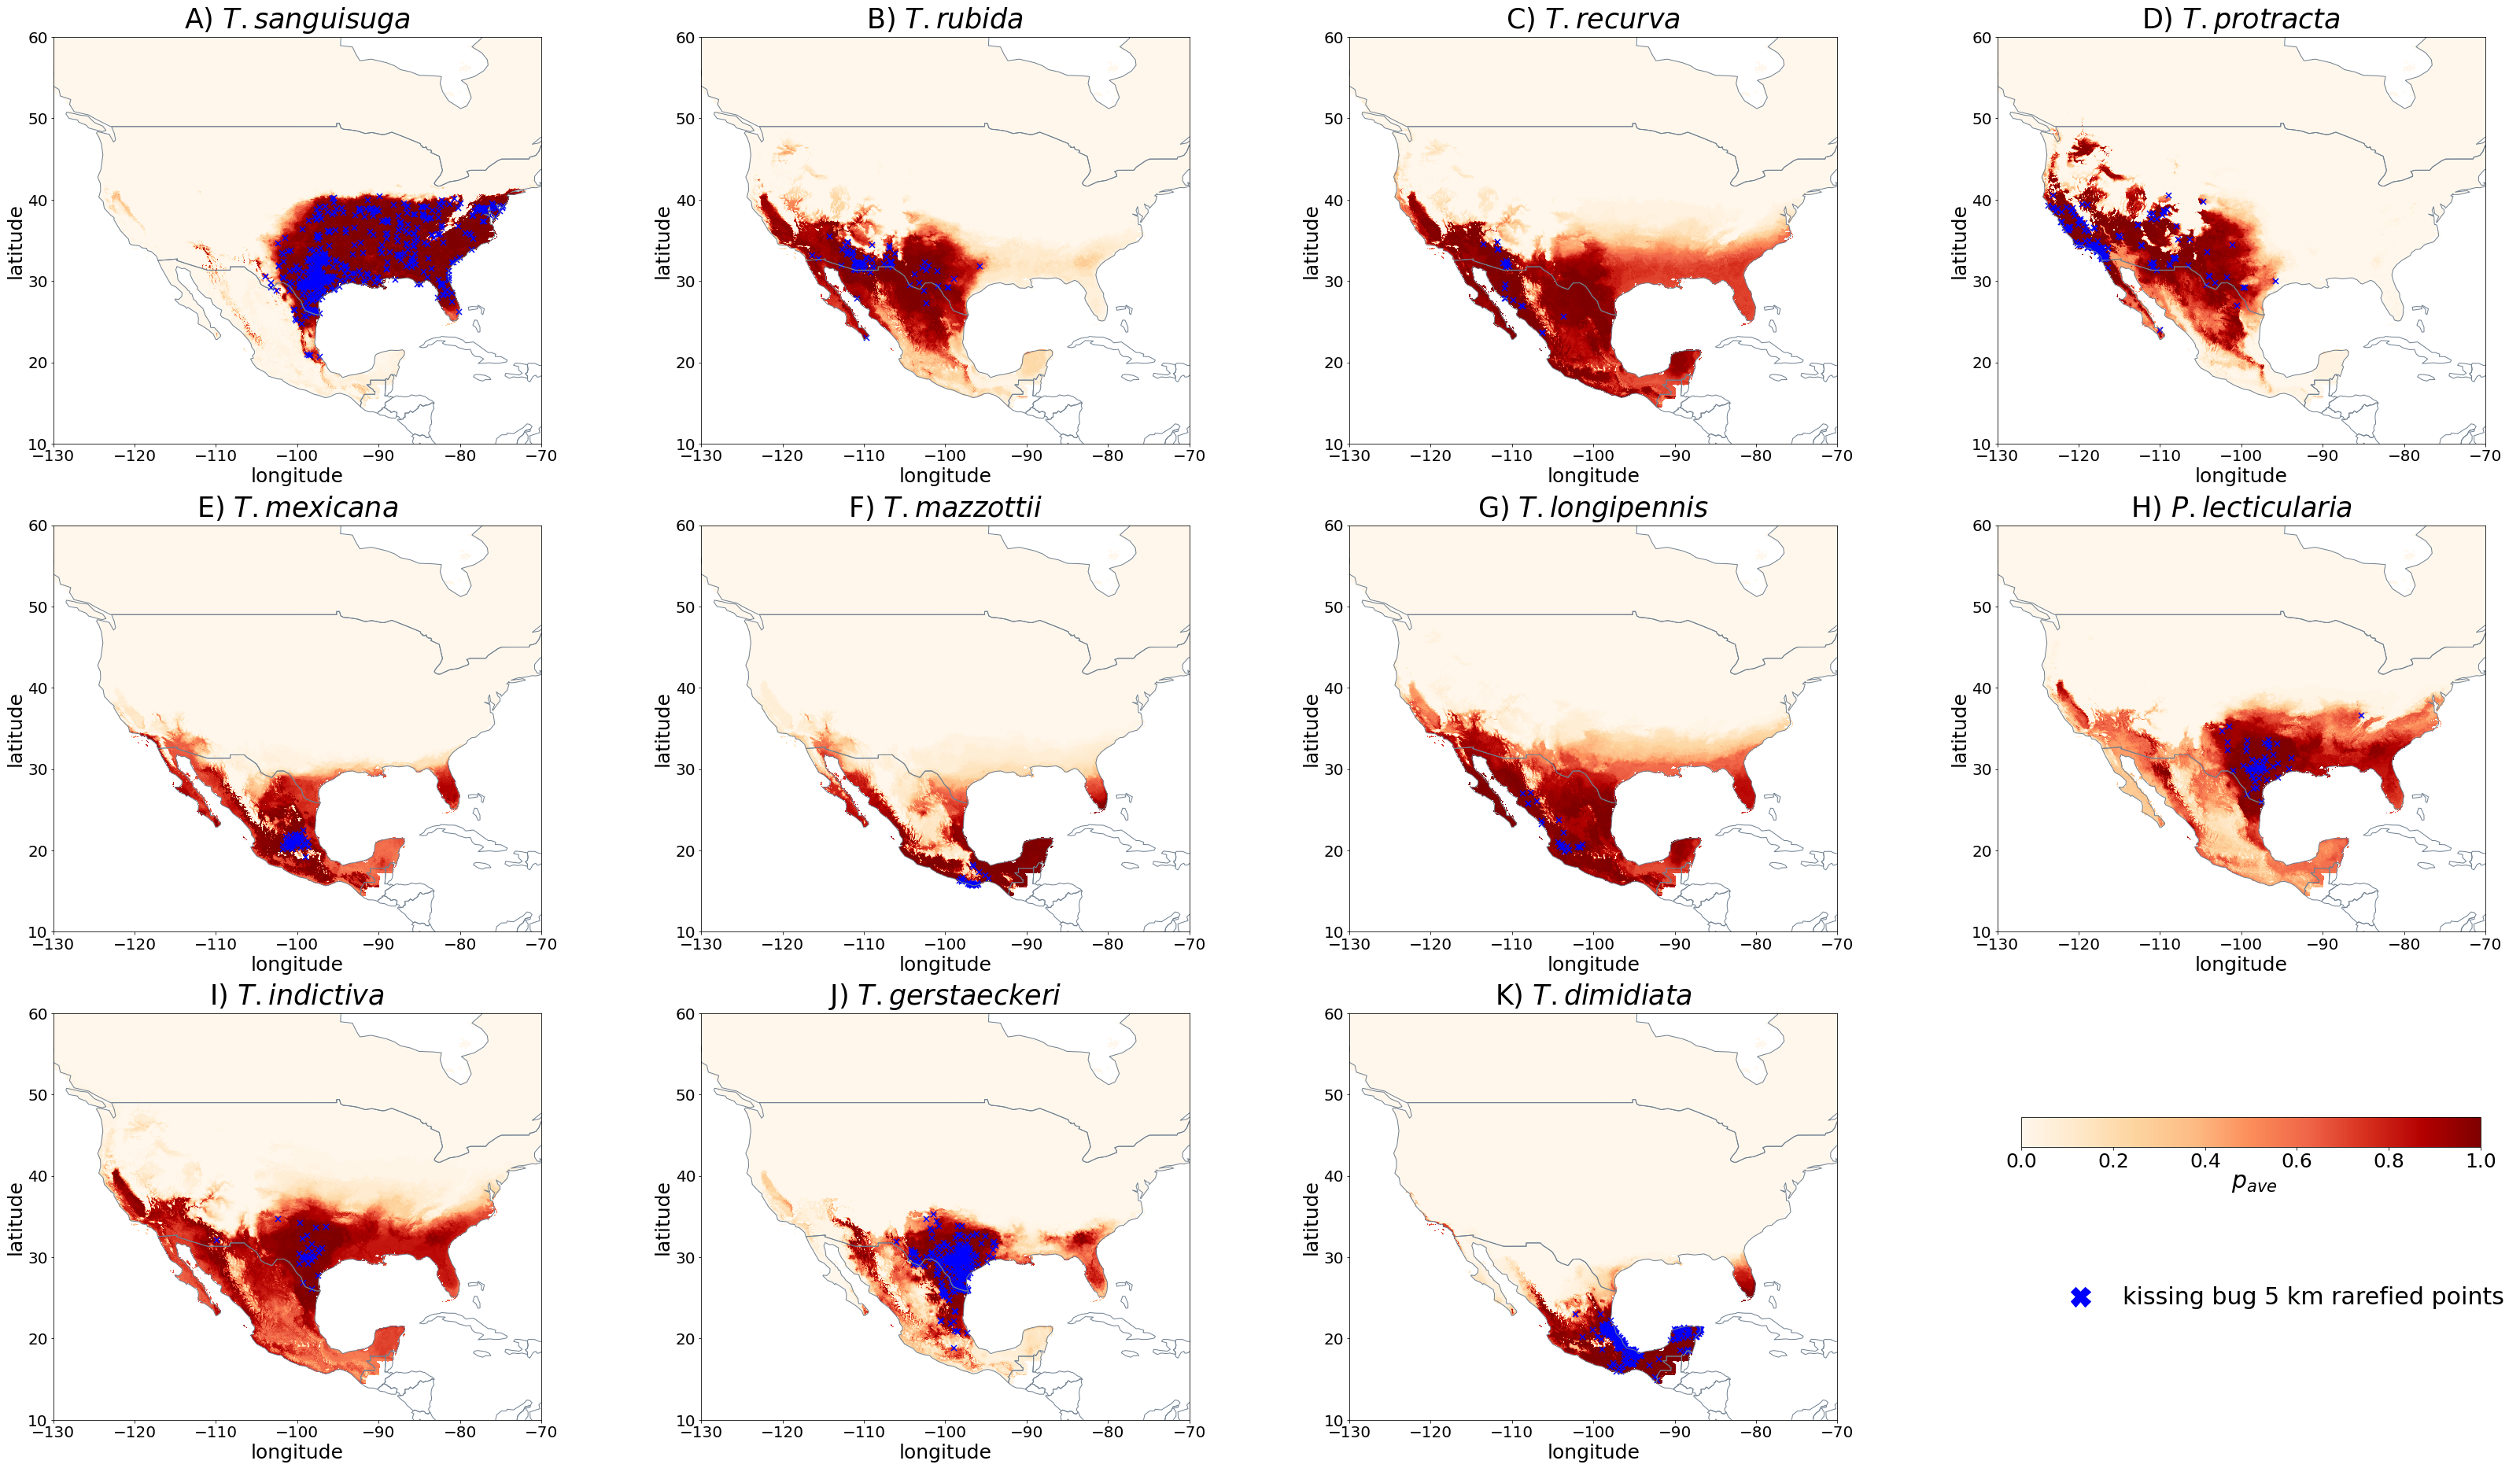

In [10]:

fig, ax = plt.subplots(3,4, figsize=(45,26))


sp_rarefied_name_list = ['san','rub','rec','pro','mex','maz','lon','lec','ind','ger','dim']
sp_rarefied_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
bug_name_list = ['San','Rub','Rec','Pro','Mex','Maz','Lon','Lec','Ind','Ger','Dim']
predict_list = ['2011_2040','2041_2070','2071_2100']

rarefied_name = ''
grid_name = '5'
buffer_name = 'b_05'
ssp_list = ['ssp126','ssp245','ssp370','ssp585']
label_ssp = 'ssp126'
num_runs = 50


for i in range(len(sp_rarefied_name_list)):

    
    ax_0 = i // 4
    ax_1 = i % 4


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1,figsize=(6,5))

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    ax[ax_0,ax_1].tick_params(axis='x', labelsize= 20 )
    ax[ax_0,ax_1].tick_params(axis='y', labelsize= 20 )
    ax[ax_0,ax_1].set_xlim([-130,-70])
    ax[ax_0,ax_1].set_ylim([10,60])
    ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    
    name_for_saving = bug_name_list[i]+rarefied_name+'_g'+grid_name+'_'+buffer_name
    
    pre_dir = '/Users/huangliting/Desktop/kissing_bugs_stats/predictions/'+name_for_saving
    pre_path = pre_dir+'/'+name_for_saving+'_'+str(num_runs)+'iters.csv'
    pre_select = pd.read_csv(pre_path)
    pre_select.drop(columns=['Unnamed: 0'], inplace=True)
        
    gdf3 = gpd.GeoDataFrame(pre_select.merge(grid_5, on="id"))
    gdf3.plot(column='prediction', ax=ax[ax_0,ax_1], cmap="OrRd",vmin=0, vmax=1)
    
    #5km
    sp_path = '/Users/huangliting/Desktop/kissing_bugs_stats/Rarefied_Data/'+bug_name_list[i]+'_rarefied_points.csv'
    pre_select = pd.read_csv(sp_path)
    gdf5 = gpd.GeoDataFrame(pre_select, geometry=gpd.points_from_xy(pre_select.longitudes, pre_select.latitudes))
    gdf5.crs = 'epsg:4326'
    gdf5.plot(marker='x', ax=ax[ax_0,ax_1], color='blue', markersize=50,figsize=(6,5))
    number_points = len(pre_select)
    
    ax[ax_0,ax_1].set_aspect('equal')
   
    print(i)

  
    
    

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)




ax[2,3].set_xlim([-130,-70])
ax[2,3].set_ylim([10,60])
patch5 = Line2D([0], [0], marker='X',color='blue', label='kissing bug 5 km rarefied points',linestyle='None',markersize=25 )
plt.legend(bbox_to_anchor=(1.02, 0.3),handles=[patch5],fontsize=30,loc='center right', frameon=False)
plt.tight_layout() 

# subplot for colorbar
ax2 =fig.add_axes([0.8,0.22,0.18,0.02])
cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', cmap='OrRd')
cb.set_label(" $p_{ave}$", labelpad=0, size=30)
cb.ax.tick_params(labelsize=25)

ax[2][3].axis('off')

plt.savefig('/Users/huangliting/Desktop/kissing_bugs_stats/final_graphs/historical_predict_all.png',dpi=300)

